In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.cosmology import FlatLambdaCDM
from astropy.table import Table

import os

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, colors

import mpl_toolkits.mplot3d.art3d as art3d
from matplotlib.patches import Circle

from matplotlib.lines import Line2D

import xspec as x

import matplotlib
import matplotlib.cm as cm

from scipy import stats
from scipy.optimize import curve_fit

In [2]:
clusters = pd.read_csv("../data/eROSITA_30.0x30.0/Catalouges/cluster.dat", sep='\s+', header=0)
clusters = clusters[clusters["M500"]>1e14]
clusters = clusters[clusters["flag"]==0]
clusters

ihal     x_pix     y_pix     z_pix      Rrel          Mvir    z_true  \
171     110  0.970969  0.479718  0.014316  0.004703  2.432930e+14  0.157249   
187     163  0.388924  0.570999  0.016006  0.004675  2.390080e+14  0.157312   
350      77  0.380183  0.570491  0.033800  0.005197  3.282700e+14  0.157977   
820      68  0.735543  0.863489  0.086085  0.005228  3.341870e+14  0.159935   
1245    111  0.804864  0.355207  0.133510  0.004668  2.379170e+14  0.161713   
...     ...       ...       ...       ...       ...           ...       ...   
18589   113  0.839159  0.495644  0.394607  0.011199  2.242680e+14  0.063945   
18610   199  0.149218  0.307198  0.406194  0.011455  2.400200e+14  0.064342   
19523   349  0.373303  0.943536  0.987909  0.010375  1.783400e+14  0.084342   
19771   323  0.759637  0.387809  0.508332  0.020783  1.912580e+14  0.034099   
19787    83  0.926032  0.822913  0.526959  0.026050  3.766600e+14  0.034717   

          z_obs          M500     R500      Mstar500       Mgas500     T500  \
171    0.157891  1.366960e+14  688.128  4.470500e+12  1.209540e+13  2.44633   
187    0.159659  1.126680e+14  645.187  2.896080e+12  1.061830e+13  2.43074   
350    0.157810  1.925340e+14  771.351  5.156740e+12  2.121000e+13  3.21771   
820    0.160192  1.800240e+14  754.271  6.340420e+12  1.596800e+13  3.57076   
1245   0.161111  1.321030e+14  680.349  4.667490e+12  9.869480e+12  2.78095   
...         ...           ...      ...           ...           ...      ...   
18589  0.063977  1.184480e+14  615.838  2.883010e+12  1.160680e+13  2.22808   
18610  0.064928  1.282700e+14  632.408  3.427130e+12  1.130680e+13  2.26553   
19523  0.084015  1.055570e+14  592.650  3.313370e+12  6.942770e+12  2.39539   
19771  0.033707  1.272360e+14  616.706  3.593030e+12  1.067760e+13  2.61661   
19787  0.033992  1.682650e+14  676.952  5.699780e+12  1.686950e+13  2.84568   

          Lx500    Ysz500          M200      R200  flag  
171    0.707698  0.000003  2.049620e+14  1068.920     0  
187    0.532571  0.000003  2.049290e+14  1068.880     0  
350    1.515690  0.000005  2.887220e+14  1198.270     0  
820    0.972861  0.000004  2.724390e+14  1175.290     0  
1245   0.452088  0.000003  1.944720e+14  1050.360     0  
...         ...       ...           ...       ...   ...  
18589  0.537683  0.000002  1.889120e+14   976.536     0  
18610  0.455429  0.000002  1.935300e+14   984.440     0  
19523  0.231120  0.000002  1.464050e+14   897.005     0  
19771  0.651073  0.000003  1.638830e+14   910.698     0  
19787  0.951228  0.000004  2.866160e+14  1097.250     0  

[84 rows x 18 columns]

In [65]:
wd = "../data/eROSITA_30.0x30.0/Phox/"
mylist = sorted(os.listdir(wd))

phlists = [item for item in mylist if item[:6] == "phlist"]

print(phlists)

phlists_redshifts = [fits.open(wd+item)[0].header["REDSHIFT"] for item in phlists]#[::-1]

print(phlists_redshifts)

['phlist_124.fits', 'phlist_128.fits', 'phlist_132.fits', 'phlist_136.fits', 'phlist_140.fits']
[0.174192889973847, 0.13708140389145, 0.101142861718869, 0.0663401914452304, 0.032637492755919]


In [66]:
geometry = pd.read_csv("../data/eROSITA_30.0x30.0/Catalouges/geometry.dat", sep='\s+', header=2)
geometry

snapNr      ztab    zslice   z_start     z_end          x0          y0  \
0     144  0.001001  0.008625  0.000000  0.017281  230.604600   52.929941   
1     140  0.033671  0.033822  0.017281  0.050478  305.341400  149.855590   
2     136  0.067408  0.067555  0.050478  0.084760   97.871486  134.586170   
3     132  0.102245  0.102388  0.084760  0.120158  185.353850  229.067940   
4     128  0.138220  0.138357  0.120158  0.156713  146.337120  179.784950   
5     124  0.175368  0.175501  0.156713  0.194460  170.716390  187.570430   

           z0       depth       width  
0   38.137176   73.327162   21.167728  
1  172.109480  139.387980   82.573299  
2  117.805860  141.855220  163.761220  
3  294.134880  144.222380  246.344710  
4  264.241690  146.478010  330.262680  
5  175.891600  148.610980  415.447530

In [72]:
binned_clusters = {}
   
for borders in list(zip(geometry["z_start"], geometry["z_end"], geometry["zslice"], geometry["snapNr"])):
    
    for ind in clusters.index:

        zt = clusters.loc[ind]["z_true"]

        if zt > borders[0] and zt < borders[1]:

            binned_clusters[ind] = borders[2], str(borders[3])
                
#sorted(binned_clusters.items())

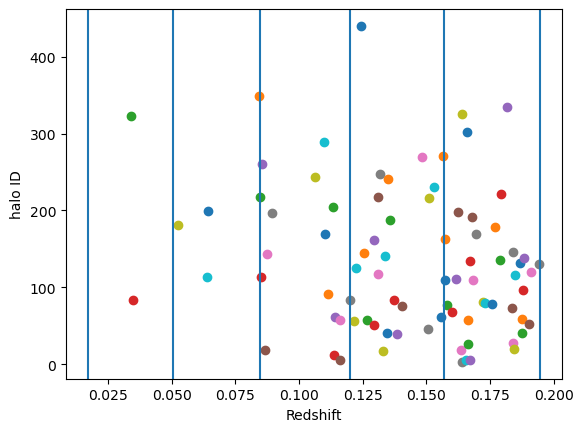

In [68]:
for cl_num in clusters.index[:]:
    #print(i, cl_num, clusters["z_true"][cl_num])
    plt.scatter(clusters["z_true"][cl_num], clusters["ihal"][cl_num])
    
for j in geometry["z_end"]:
    plt.axvline(j)
    
plt.xlabel("Redshift")
plt.ylabel("halo ID")
plt.show()

## (A) Single cluster

<Figure size 640x480 with 0 Axes>

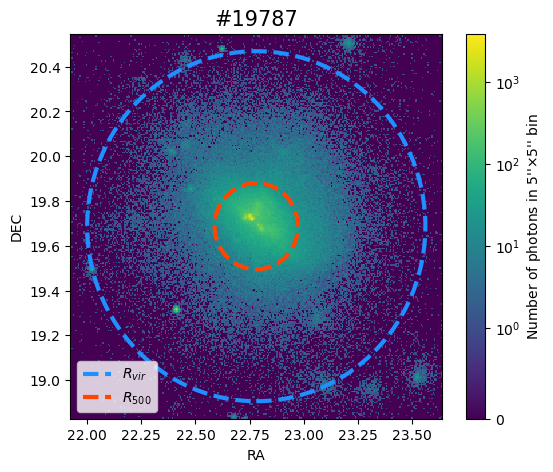

In [45]:
%run -i 'utils/scripts.py'

cl_num = 19787
cl_red = clusters.loc[cl_num]["z_true"]
cl_t500 = clusters.loc[cl_num]["T500"]

plt.figure(figsize=(6,5))
pho_list = extract_photons_from_cluster(cl_num, r = 'R500', draw=True)

#display(pho_list)

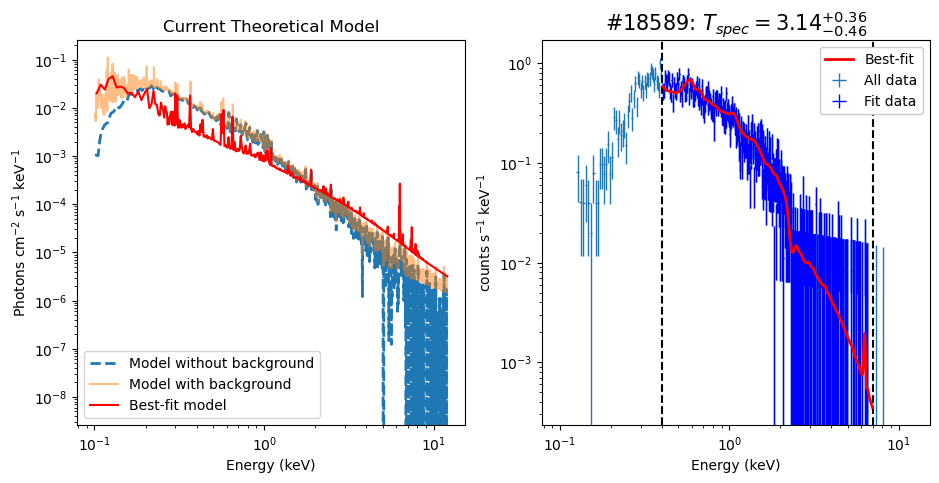

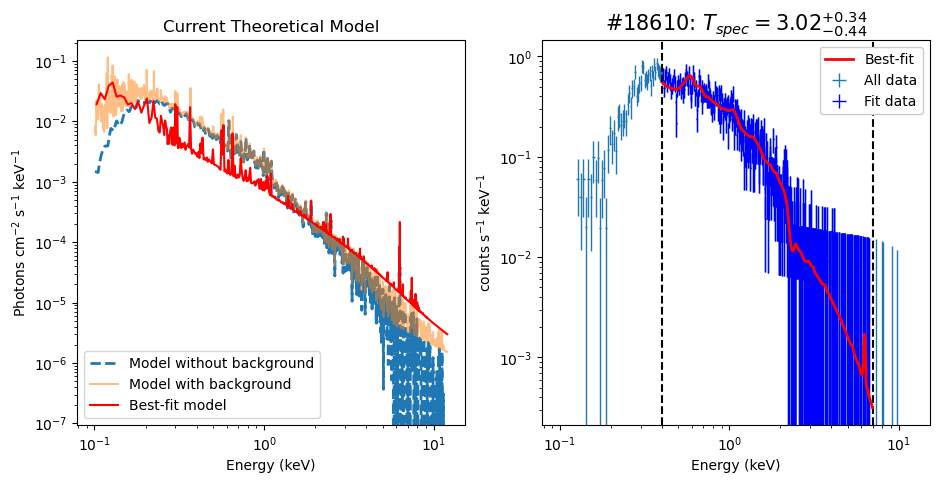

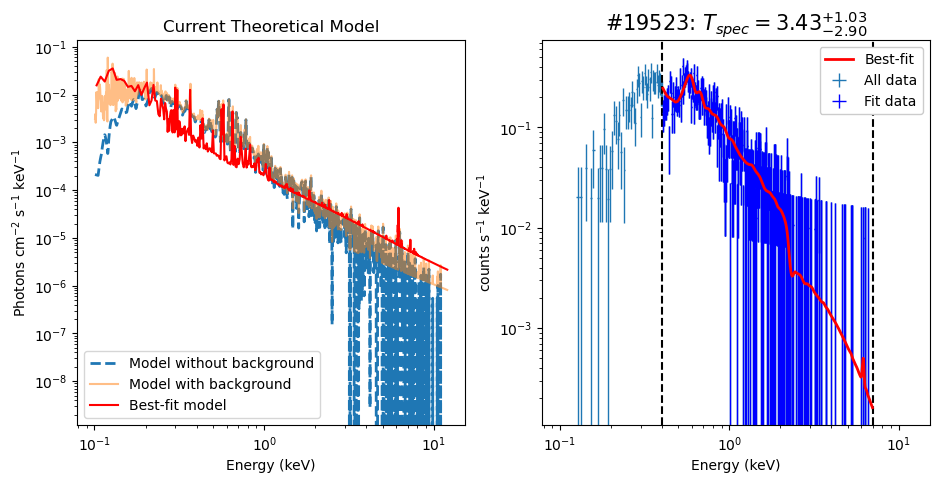

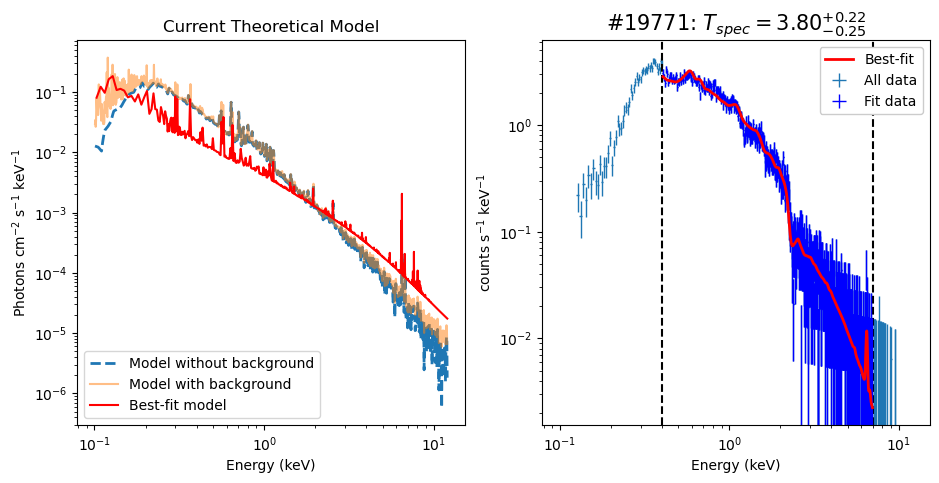

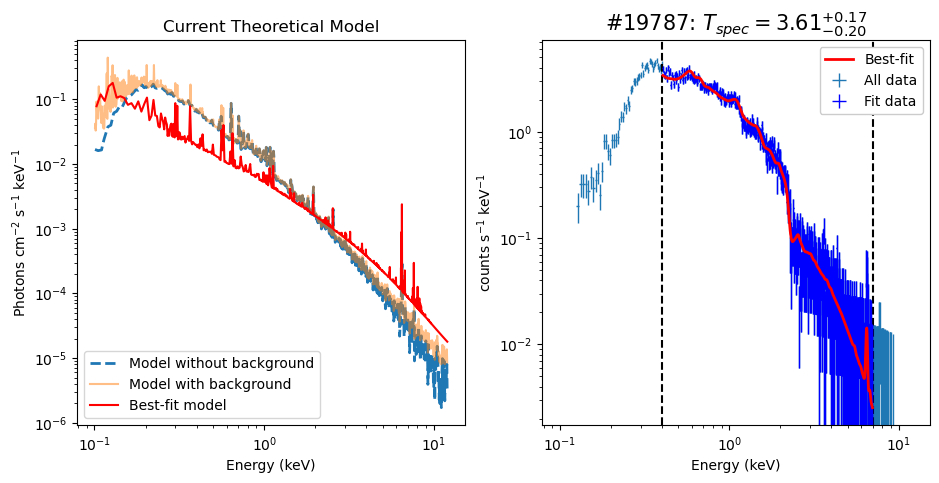

In [492]:
for cl_num in clusters.index[-5:]:
    
    plt.figure(figsize=(11, 5))
    create_spectrum_and_fit_it(cl_num, borders=[0.4, 7.0], BACKGROUND=True, inside_radius="R500",
                                Xplot=False, plot=True, also_plot_model=True)
     
    plt.show()

<Figure size 640x480 with 0 Axes>

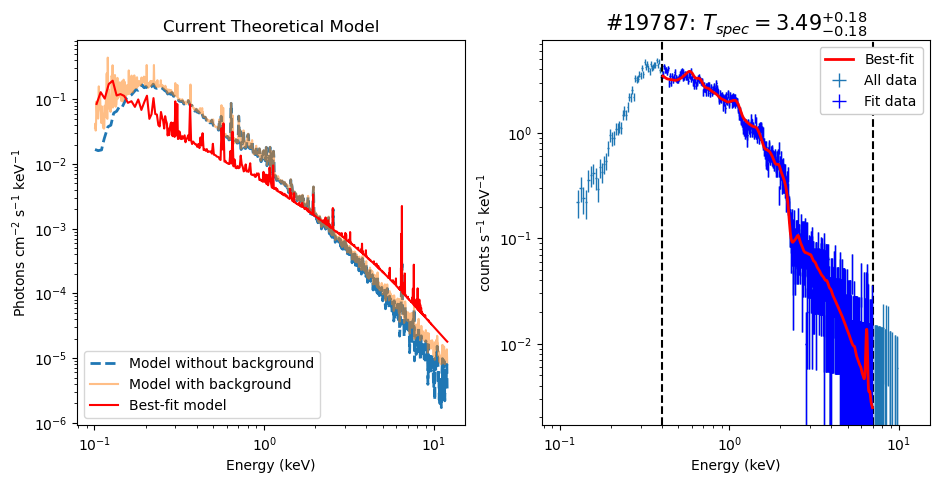


1 file 1 spectrum 
Spectrum 1  Spectral Data File: fakeit.pha
Net count rate (cts/s) for Spectrum:1  2.974e+00 +/- 1.724e-02
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  58-722
  Telescope: eROSITA Instrument: TM1  Channel Type: PI
  Exposure Time: 1e+04 sec
 Using fit statistic: cstat
 Using Response (RMF) File            ../erosita/erosita_pirmf_v20210719.rmf for Source 1
 Using Auxiliary Response (ARF) File  ../erosita/tm1_arf_open_000101v02.fits



In [490]:
%run -i 'utils/scripts.py'

#create_spectrum_old(pho_list, REDSHIFT=clusters.loc[cl_num]["z_true"]) # or binned_clusters[19787][0] ???

plt.figure(figsize=(11, 5))

SP = create_spectrum_and_fit_it(cl_num, borders=[0.4, 7.0], BACKGROUND=True, inside_radius="R500",
                                Xplot=False, plot=True, also_plot_model=True)

plt.show()

#print(SP)
x.AllData.show()

The use of the $\chi^2$ statistic for evaluating the goodness of fit. The data here are a series of observations of the luminosity of a star, with known error bars. Our model assumes that the brightness of the star does not vary; that is, all the scatter in the data is due to measurement error. $\chi^2_{\rm dof} \approx 1$ indicates that the model fits the data well (upper-left panel). $\chi^2_{\rm dof}$ much smaller than 1 (upper-right panel) is an indication that the errors are overestimated. $\chi^2_{\rm dof}$ much larger than 1 is an indication either that the errors are underestimated (lower-left panel) or that the model is not a good description of the data (lower-right panel). In this last case, it is clear from the data that the star’s luminosity is varying with time: this situation is be treated more fully in chapter 10. [Source](https://www.astroml.org/book_figures/chapter4/fig_chi2_eval.html)

[Kaastra (2017): On the use of C-stat in testing models for X-ray spectra](https://www.aanda.org/articles/aa/pdf/2017/09/aa29319-16.pdf)

[Dos and don’ts of reduced chi-squared](https://arxiv.org/pdf/1012.3754.pdf)

## (B)  Draw all 84 clusters

<Figure size 640x480 with 0 Axes>

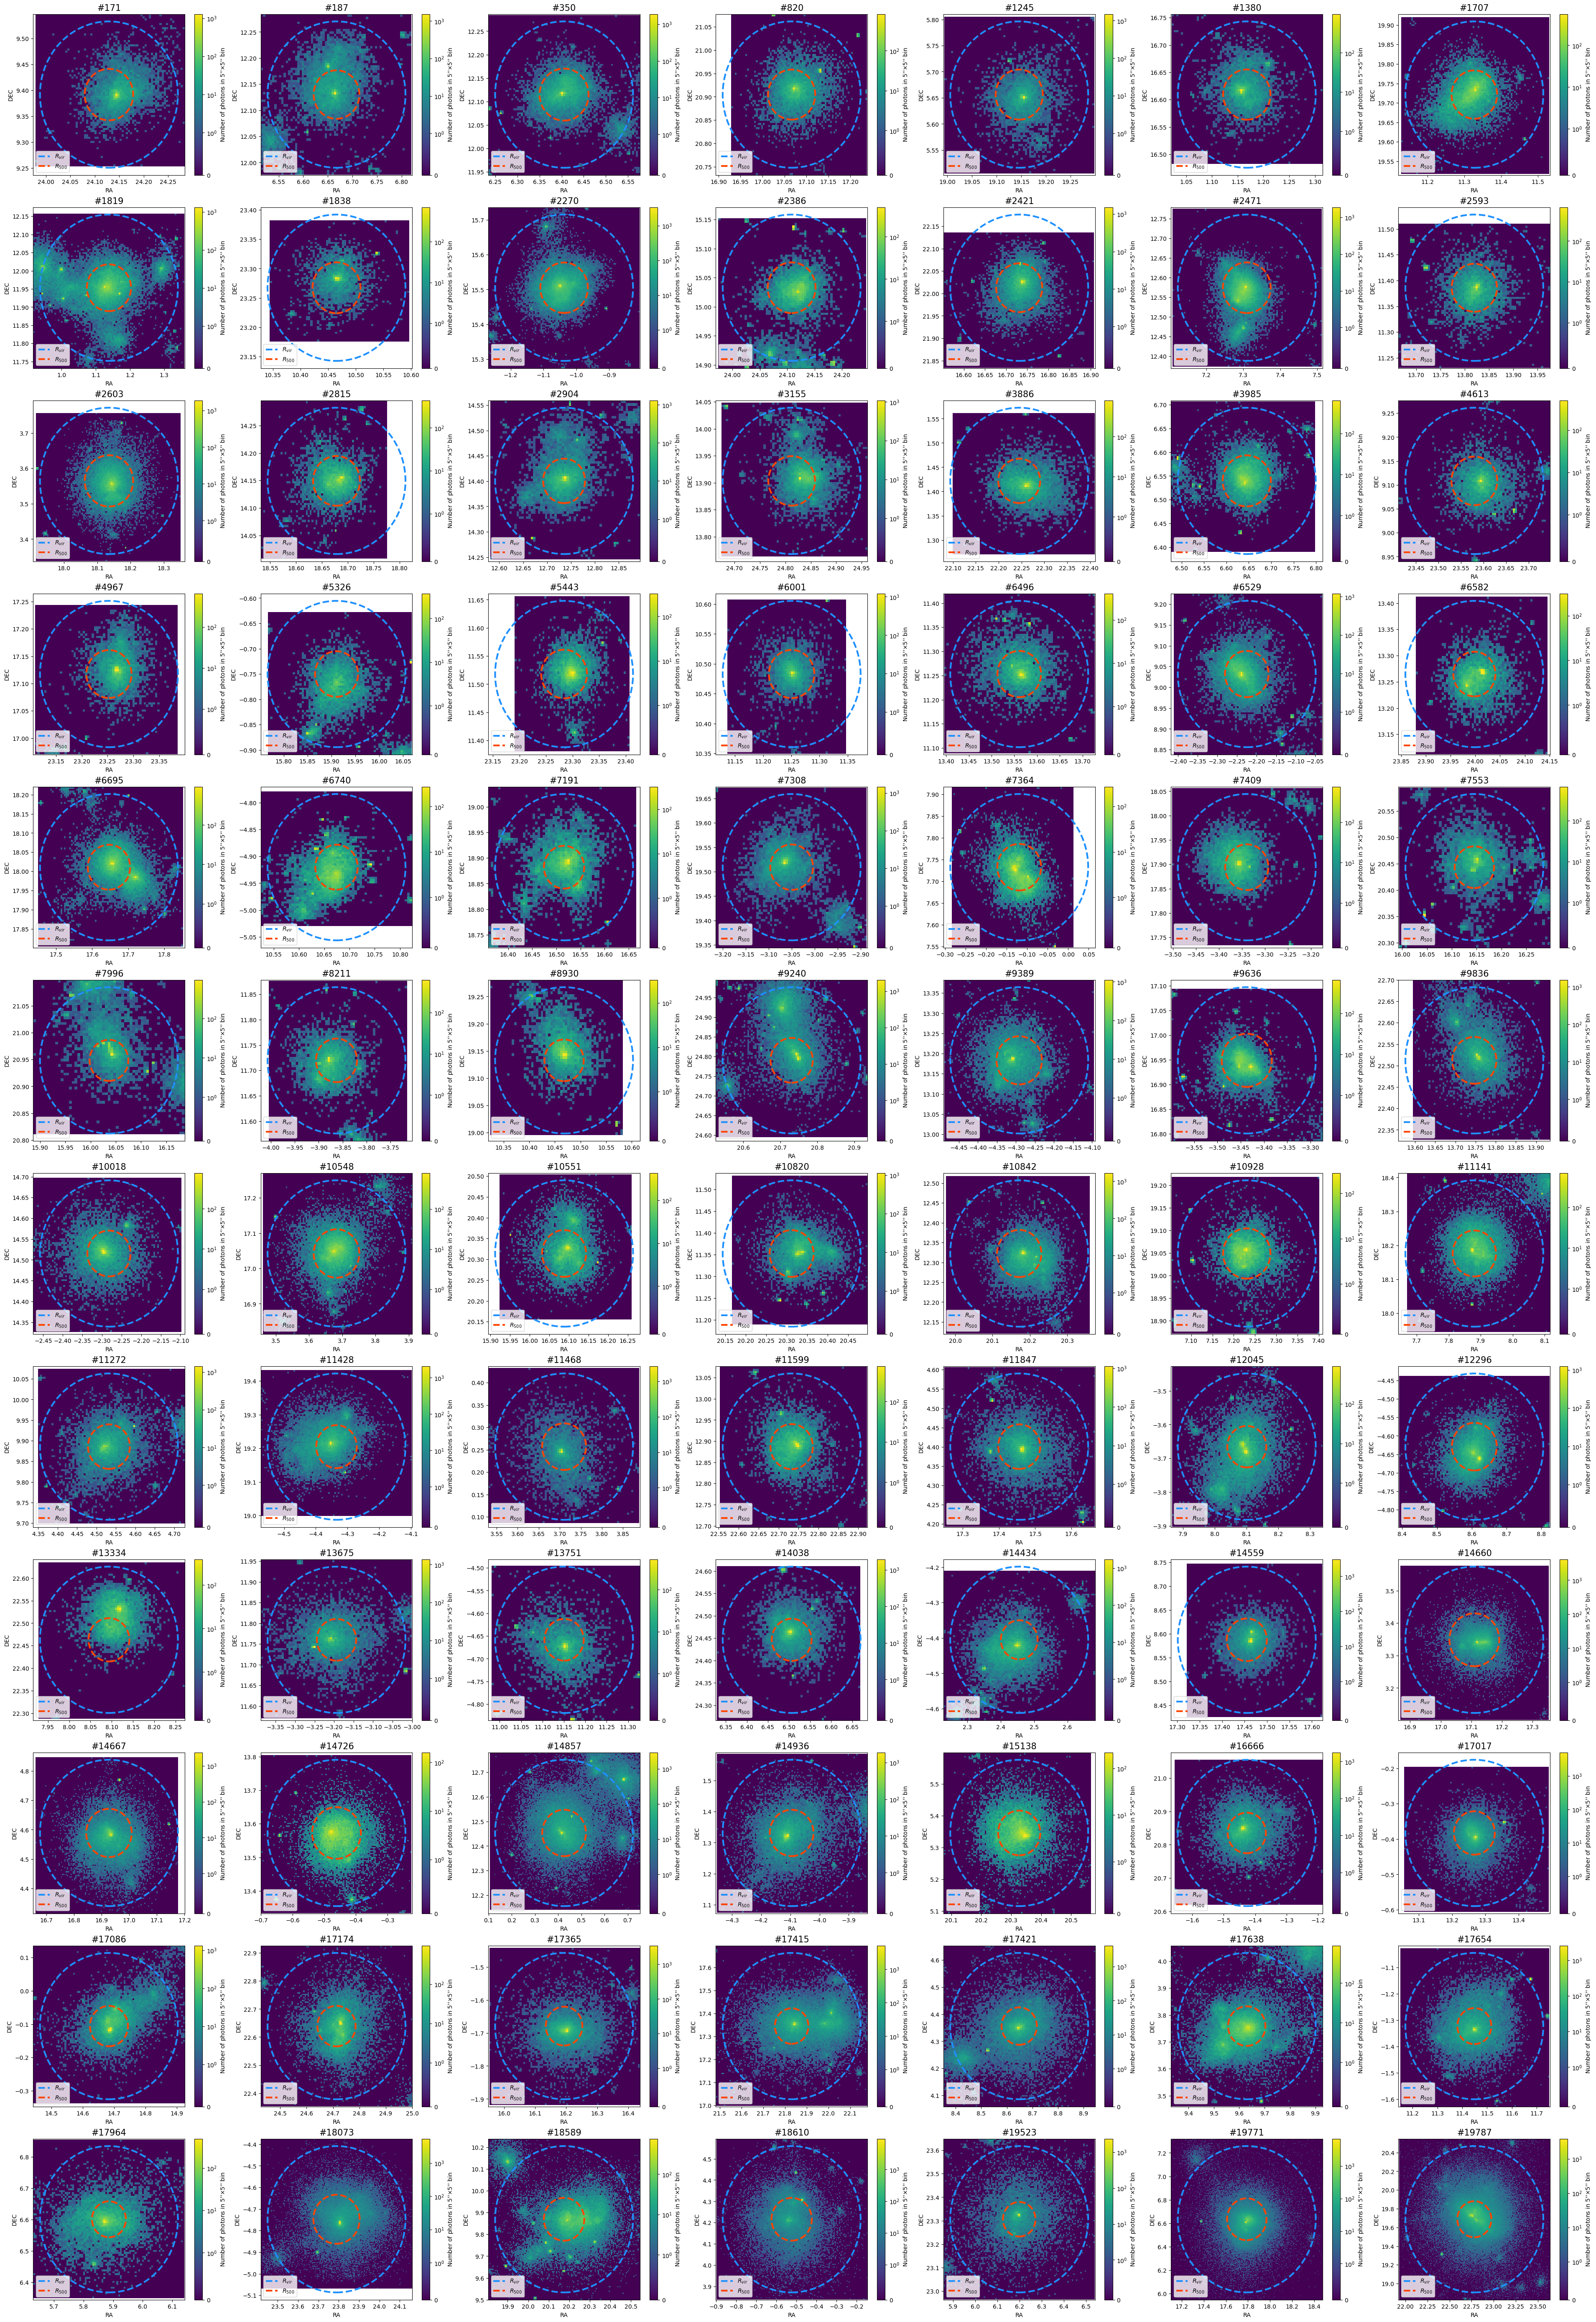

In [61]:
%run -i 'utils/scripts.py'

NNN = 84
size = 5

plt.figure(figsize=((size+1)*7+6, size*12+11))
plt.tight_layout()

for cl_num in clusters.index[:NNN]:
    
    plt.subplot(12, 7, np.where(np.array(clusters.index[:NNN]) == cl_num)[0][0]+1)
    
    pho_list = extract_photons_from_cluster(cl_num, r = 'R500', draw=True)
     
plt.show()

## (B0)  Fit  and draw all 84 clusters' spectra

#### Considering: abundance = 0.3, cstat, exposure = 10000 s, weights = standard 

<Figure size 640x480 with 0 Axes>

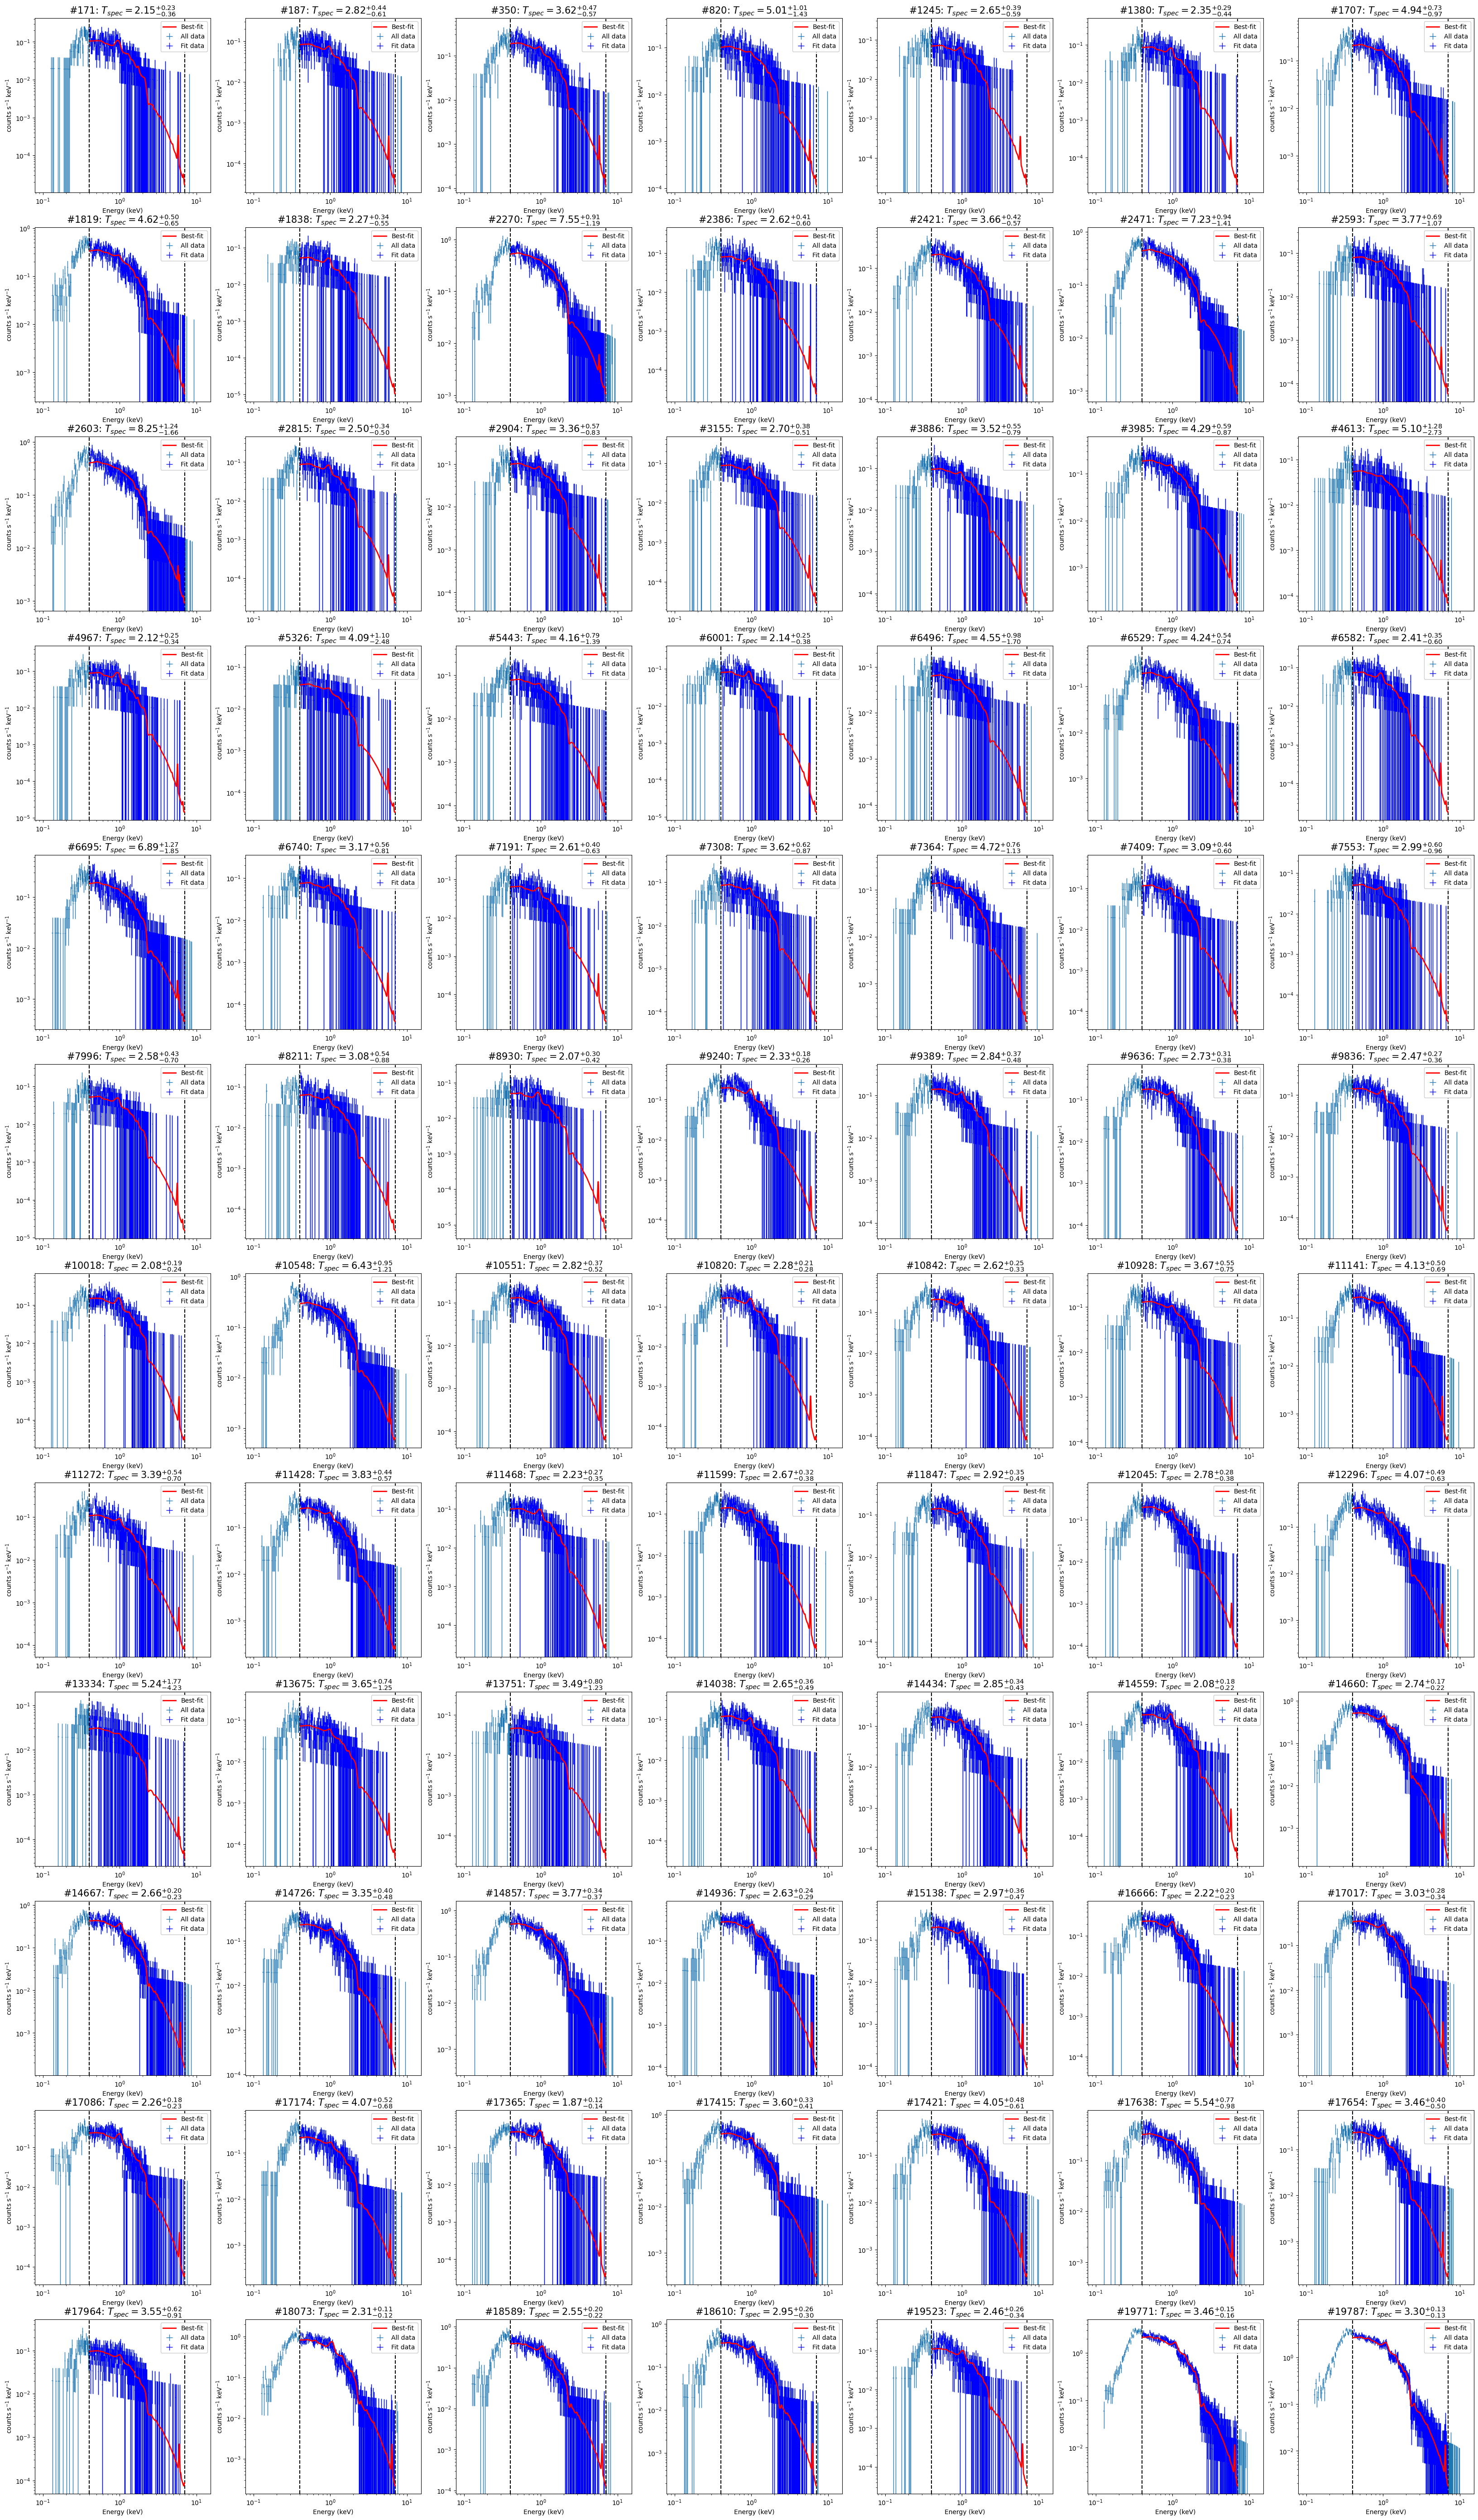

In [131]:
%run -i 'utils/scripts.py'

temp_compare = {}
lumin_compare = {}
average_ene = {}

NNN = 84
size = 5

plt.figure(figsize=(size*7+6, size*12+11))
plt.tight_layout()

for cl_num in clusters.index[:NNN]:
           
    cl_T500 = clusters.loc[cl_num]["T500"]
    cl_lum = clusters.loc[cl_num]["Lx500"]
    
    plt.subplot(12, 7, np.where(np.array(clusters.index[:NNN]) == cl_num)[0][0]+1)
    
    SP = create_spectrum_and_fit_it(cl_num, borders=[0.4, 7.0], inside_radius="R500",
                                    Xplot=False, plot=True, also_plot_model=False)

    temp_compare[cl_num] = [cl_T500, SP[0][:3]]
    lumin_compare[cl_num] = [cl_lum, SP[1][:3]]
    average_ene[cl_num] = [SP[2]]
    
plt.show()

In [132]:
#temp_compare, lumin_compare

### (B1) Temperature and luminosity from fit as a functions of $T_{500}$ and $L_{500}$ from simulations for single fit.

[Solution](https://stackoverflow.com/questions/10208814/colormap-for-errorbars-in-x-y-scatter-plot) for plot.

In [136]:
masses = [clusters.loc[i]["M500"]/10**14 for i in temp_compare.keys()]
norm = matplotlib.colors.Normalize(vmin=min(masses), vmax=max(masses), clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap='viridis')
mass_colour = np.array([(mapper.to_rgba(v)) for v in masses])

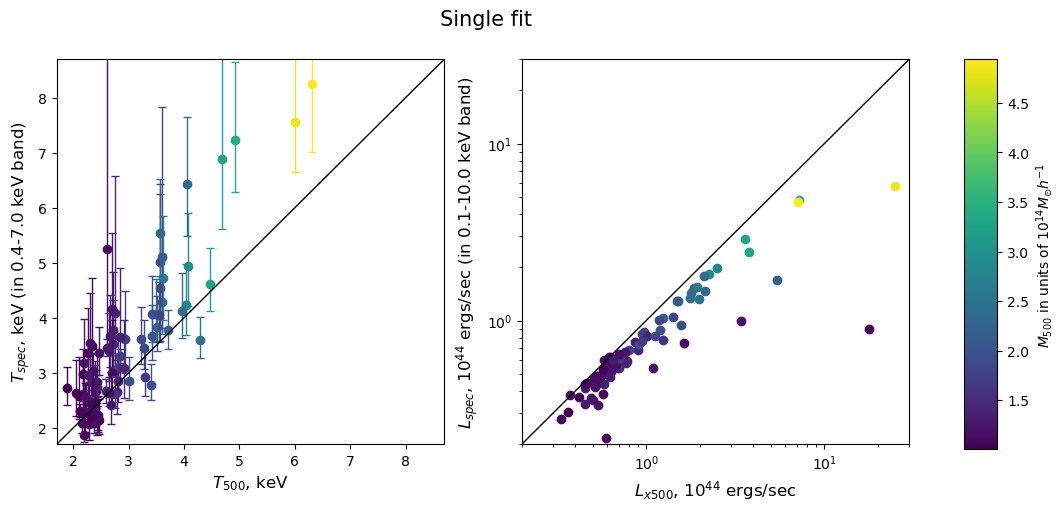

In [167]:
plt.figure(figsize=(11,5))

plt.suptitle("     Single fit", fontsize=15)

plt.subplot(121)

xx = [a[0] for a in temp_compare.values()]
yy = [a[1][0] for a in temp_compare.values()]
yll = [a[1][1] for a in temp_compare.values()]
yrr = [a[1][2] for a in temp_compare.values()]
yerr_l = [a-b for a, b in zip(yy, yll)]
yerr_r = [a-b for a, b in zip(yrr, yy)]

#plt.errorbar(xx, yy, yerr=[yerr_l, yerr_r], linewidth=0, elinewidth=1, color='b', marker='o', markersize=3)

for xxx, yyy, e1, e2, col in zip(xx, yy, yerr_l, yerr_r, mass_colour):
    plt.plot(xxx, yyy, 'o', color=col)
    plt.errorbar(xxx, yyy, yerr=[[e1], [e2]], elinewidth=1, capsize=3, color=col)

plt.xlabel("$T_{500}$, keV", fontsize=12)
plt.ylabel("$T_{spec}$, keV (in 0.4-7.0 keV band)", fontsize=12)

plt.xlim(1.7, 8.7)
plt.ylim(1.7, 8.7)

plt.plot([min(plt.gca().get_xlim()), max(plt.gca().get_xlim())],
         [min(plt.gca().get_ylim()), max(plt.gca().get_ylim())], color='black', linewidth=1)

plt.subplot(122)

xx = [a[0] for a in lumin_compare.values()]
yy = [a[1][0] for a in lumin_compare.values()]
yll = [a[1][1] for a in lumin_compare.values()]
yrr = [a[1][2] for a in lumin_compare.values()]
yerr_l = [a-b for a, b in zip(yy, yll)]
yerr_r = [a-b for a, b in zip(yrr, yy)]

#plt.errorbar(xx, yy, yerr=[yerr_l, yerr_r], linewidth=0, elinewidth=1, color='b', marker='o', markersize=3)

for xxx, yyy, e1, e2, col in zip(xx, yy, yerr_l, yerr_r, mass_colour):
    plt.plot(xxx, yyy, 'o', color=col)
    plt.errorbar(xxx, yyy, yerr=[[e1], [e2]], elinewidth=1, capsize=3, color=col)

plt.xlabel("$L_{x500}$, $10^{44}$ ergs/sec", fontsize=12)
plt.ylabel("$L_{spec}$, $10^{44}$ ergs/sec (in 0.1-10.0 keV band)", fontsize=12)

plt.xscale("log")
plt.yscale("log")

plt.xlim(0.2, 30)
plt.ylim(0.2, 30)

plt.plot([min(plt.gca().get_xlim()), max(plt.gca().get_xlim())],
         [min(plt.gca().get_ylim()), max(plt.gca().get_ylim())], color='black', linewidth=1)

plt.subplots_adjust(right=0.9)
sc = plt.scatter(xx, yy, c=masses, s=5)
clb = plt.colorbar(sc, cax = plt.axes([0.95, 0.1, 0.03, 0.78]), 
                   label = "$M_{500}$ in units of $10^{14} M_{\odot} h^{-1}$")

plt.show()

#### There are no errors for luminosity (xspec somehow doesn't calculate them)

### (B2) Average energy as a function of temperature for single fit

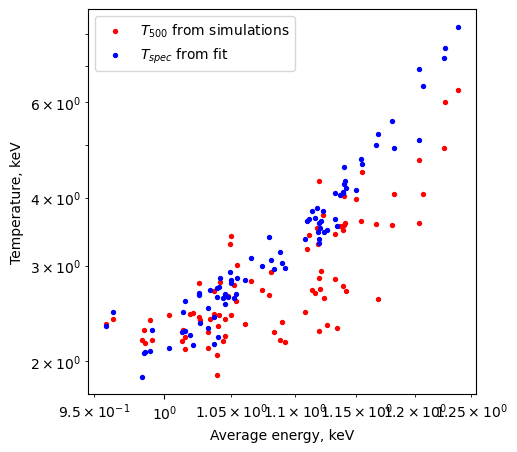

In [141]:
plt.figure(figsize=(5,5))

xg = average_ene.values()
yg0 = [a[0] for a in temp_compare.values()]
yg1 = [a[1][0] for a in temp_compare.values()]
plt.scatter(xg, yg0, c='red', s=8, label='$T_{500}$ from simulations')
plt.scatter(xg, yg1, c='blue', s=8, label='$T_{spec}$ from fit')

plt.xlabel("Average energy, keV")
plt.ylabel("Temperature, keV")

plt.xscale("log")
plt.yscale("log")

#plt.colorbar(label = "$M_{500}$ in units of $10^{14} M_{\odot} h^{-1}$")
plt.legend()

plt.show()

## (C) Averaging

In [279]:
%run -i 'utils/scripts.py'

NNNN = 10

temp_usr, lumin_usr, aven_usr = calculate_all_and_average_it(NNNN, clusters)

 | 171 : 12345678910 | 187 : 12345678910 | 350 : 12345678910 | 820 : 12345678910 | 1245 : 12345678910 | 1380 : 12345678910 | 1707 : 12345678910 | 1819 : 12345678910 | 1838 : 12345678910 | 2270 : 12345678910 | 2386 : 12345678910 | 2421 : 12345678910 | 2471 : 12345678910 | 2593 : 12345678910 | 2603 : 12345678910 | 2815 : 12345678910 | 2904 : 12345678910 | 3155 : 12345678910 | 3886 : 12345678910 | 3985 : 12345678910 | 4613 : 12345678910 | 4967 : 12345678910 | 5326 : 12345678910 | 5443 : 12345678910 | 6001 : 12345678910 | 6496 : 12345678910 | 6529 : 12345678910 | 6582 : 12345678910 | 6695 : 12345678910 | 6740 : 12345678910 | 7191 : 12345678910 | 7308 : 12345678910 | 7364 : 12345678910 | 7409 : 12345678910 | 7553 : 12345678910 | 7996 : 12345678910 | 8211 : 12345678910 | 8930 : 12345678910 | 9240 : 12345678910 | 9389 : 12345678910 | 9636 : 12345678910 | 9836 : 12345678910 | 10018 : 12345678910 | 10548 : 12345678910 | 10551 : 12345678910 | 10820 : 12345678910 | 10842 : 12345678910 | 10928 : 1

<Figure size 640x480 with 0 Axes>

In [187]:
#temp_usr, lumin_usr

### (C1) Temperature and luminosity from fit as a functions of $T_{500}$ and $L_{500}$ from several fits.

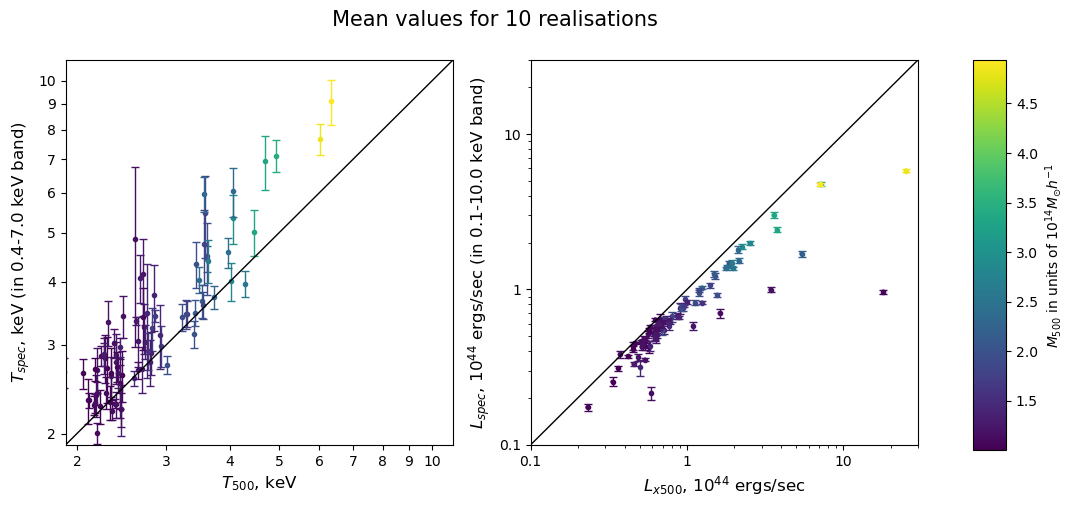

In [281]:
masses = [clusters.loc[i]["M500"]/10**14 for i in temp_compare.keys()]
norm = matplotlib.colors.Normalize(vmin=min(masses), vmax=max(masses), clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap='viridis')
mass_colour = np.array([(mapper.to_rgba(v)) for v in masses])

plt.figure(figsize=(11,5))

plt.suptitle(f"     Mean values for {NNNN} realisations", fontsize=15)

plt.subplot(121)

xx = [a[0] for a in temp_usr.values()]
yy = [a[1] for a in temp_usr.values()]
y_err = [a[2] for a in temp_usr.values()]

#plt.errorbar(xx, yy, yerr=[yerr_l, yerr_r], linewidth=0, elinewidth=1, color='b', marker='o', markersize=3)

for xxx, yyy, eee, col in zip(xx, yy, y_err, mass_colour):
    plt.plot(xxx, yyy, '.', color=col)
    plt.errorbar(xxx, yyy, yerr=eee, elinewidth=1, capsize=3, color=col)

plt.xlabel("$T_{500}$, keV", fontsize=12)
plt.ylabel("$T_{spec}$, keV (in 0.4-7.0 keV band)", fontsize=12)

plt.xlim(1.9, 11)
plt.ylim(1.9, 11)

plt.xscale("log")
plt.yscale("log")

plt.xticks([2,3,4,5,6,7,8,9,10], [2,3,4,5,6,7,8,9,10])
plt.yticks([2,3,4,5,6,7,8,9,10], [2,3,4,5,6,7,8,9,10])

plt.plot([min(plt.gca().get_xlim()), max(plt.gca().get_xlim())],
         [min(plt.gca().get_ylim()), max(plt.gca().get_ylim())], color='black', linewidth=1)


plt.subplot(122)

xx = [a[0] for a in lumin_usr.values()]
yy = [a[1] for a in lumin_usr.values()]
y_err = [a[2] for a in lumin_usr.values()]

#plt.errorbar(xx, yy, yerr=[yerr_l, yerr_r], linewidth=0, elinewidth=1, color='b', marker='o', markersize=3)

for xxx, yyy, eee, col in zip(xx, yy, y_err, mass_colour):
    plt.plot(xxx, yyy, '.', color=col)
    plt.errorbar(xxx, yyy, yerr=eee, elinewidth=1, capsize=3, color=col)

plt.xlabel("$L_{x500}$, $10^{44}$ ergs/sec", fontsize=12)
plt.ylabel("$L_{spec}$, $10^{44}$ ergs/sec (in 0.1-10.0 keV band)", fontsize=12)

plt.xscale("log")
plt.yscale("log")

plt.xlim(0.15, 30)
plt.ylim(0.15, 30)

plt.xticks([0.1, 1, 10], [0.1, 1, 10])
plt.yticks([0.1, 1, 10], [0.1, 1, 10])

plt.plot([min(plt.gca().get_xlim()), max(plt.gca().get_xlim())],
         [min(plt.gca().get_ylim()), max(plt.gca().get_ylim())], color='black', linewidth=1)

plt.subplots_adjust(right=0.9)
sc = plt.scatter(xx, yy, c=masses, s=5)
clb = plt.colorbar(sc, cax = plt.axes([0.95, 0.1, 0.03, 0.78]), 
                   label = "$M_{500}$ in units of $10^{14} M_{\odot} h^{-1}$")

plt.show()

#### Note how small are errors for luminosities!

### (C2) Average energy as a function of temperature for several fits.

In [282]:
#aven_usr

### aven_usr: [ $E_{av}, \Delta E$ ], temp_usr: [ $T_{sim}, T_{spec}, \Delta T$ ]

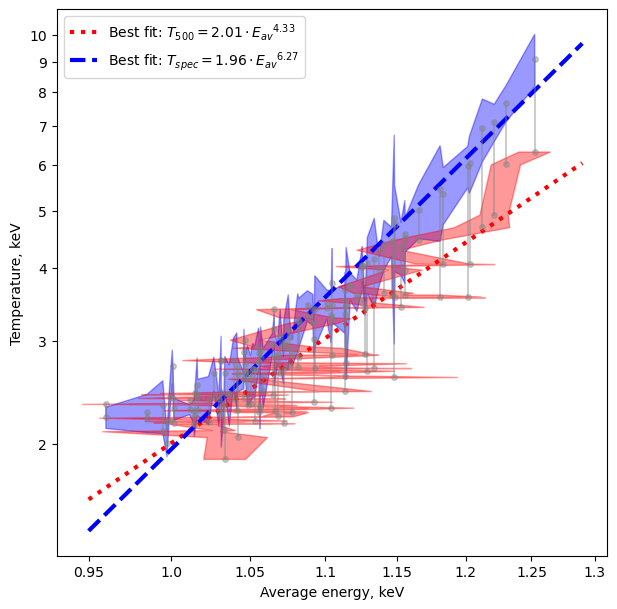

In [462]:
plt.figure(figsize=(7.1,7.1))

xx = [a[0] for a in aven_usr.values()]
x_err = [a[1] for a in aven_usr.values()]
yy1 = [a[0] for a in temp_usr.values()]
yy2 = [a[1] for a in temp_usr.values()]
y2_err = [a[2] for a in temp_usr.values()]

def func(x, a, b):
    return a * x**b

popt1, pcov1 = curve_fit(func, xx, yy1)
popt2, pcov2 = curve_fit(func, xx, yy2)

#for xxx, xe, yyy, ye, col in zip(xx, x_err, yy2, y2_err, mass_colour):
#   plt.plot(xxx, yyy, '.', color=col)
#    plt.errorbar(xxx, yyy, xerr=xe, yerr=ye, elinewidth=1, capsize=3, color=col, label='$T_{spec}$ from fit')

list1, list2, list3 = zip(*sorted(zip(xx, [n-q for n, q in zip(yy2, y2_err)], [n+q for n, q in zip(yy2, y2_err)])))
plt.fill_between(list1, list2, list3, interpolate=False, alpha=0.4, color='blue')

#plt.errorbar(xx, yy2, xerr=x_err, yerr=y2_err, linewidth=0, marker='o', markersize=4, alpha=0.1,
#             elinewidth=1, capsize=3, color='blue', label='$T_{spec}$ from fit')

lll = np.linspace(0.95, 1.29, 100)
plt.plot(lll, [func(XX, *popt1) for XX in lll],  
         color='red', linewidth=3, linestyle=':', alpha=1,
         label=f'Best fit: $T_{{500}} = {popt1[0]:.2f} \cdot {{E_{{av}}}}^{{{popt1[1]:.2f}}}$')
plt.plot(lll, [func(XX, *popt2) for XX in lll],  
         color='blue', linewidth=3, linestyle='--', alpha=1,
         label=f'Best fit: $T_{{spec}} = {popt2[0]:.2f} \cdot {{E_{{av}}}}^{{{popt2[1]:.2f}}}$')

plt.xlabel("Average energy, keV")
plt.ylabel("Temperature, keV")

plt.xscale("log")
plt.yscale("log")

#sc = plt.scatter(xx, yy1, c='red', s=0)
#clb = plt.colorbar(sc, label = "$M_{500}$ in units of $10^{14} M_{\odot} h^{-1}$")

list1, list2, list3 = zip(*sorted(zip(yy1, [n-q for n, q in zip(xx, x_err)], [n+q for n, q in zip(xx, x_err)])))
plt.gca().fill_betweenx(list1, list2, list3, interpolate=True, alpha=0.4, color='red')

#plt.errorbar(xx, yy1, xerr=x_err, linewidth=0, elinewidth=1, capsize=3,
#             color='red', marker='o', markersize=4, alpha=0.1, label='$T_{500}$ from simulations')

#plt.xlim(1.4, 7.5)
#plt.ylim(0.9, 1.3)

plt.xticks([0.95, 1.00, 1.05, 1.10, 1.15, 1.2, 1.25, 1.3], [0.95, 1.00, 1.05, 1.10, 1.15, 1.2, 1.25, 1.3])
plt.yticks([2,3,4,5,6,7,8,9,10], [2,3,4,5,6,7,8,9,10])

for i in range(0, len(aven_usr)):
    plt.plot([xx[i]+0.000454, xx[i]+0.000454], 
             [yy1[i], yy2[i]], 
             color='grey', alpha=0.4, marker='o', markersize=4)

#plt.grid()
plt.legend()

plt.show()

In [ ]:
%run -i 'utils/draw.py'

plot_T_vs_avE(avE=aven_usr, Tsp=temp_usr)

#### Writing everything in a table:

In [324]:
#temp_usr, lumin_usr, aven_usr

##### Check that abundance is FIXED (at 0.3 Solar) here:

In [431]:
df1 = pd.DataFrame(temp_usr.values())
df2 = pd.DataFrame(lumin_usr.values())
df3 = pd.DataFrame(aven_usr.values())

df_all = pd.concat([df1, df2, df3], axis=1)

df_all.columns = ['$T_{500}$', '$T_{spec}$', '$\Delta T_{spec}$',
                  '$L_{bol}$', '$L_{fit}$', '$\Delta L_{fit}$',
                  '$E_{av}$', '$\Delta E_{av}$']
df_all.index = aven_usr.keys()

display(df_all)

df_all.to_csv('tables/table_ab-fix_cstat_10ks_standard.csv', sep=' ', header=False, index=True)

$T_{500}$  $T_{spec}$  $\Delta T_{spec}$  $L_{bol}$  $L_{fit}$  \
171      2.44633    2.236343           0.259238   0.707698   0.551212   
187      2.43074    2.522588           0.285270   0.532571   0.451380   
350      3.21771    3.401725           0.208874   1.515690   1.216203   
820      3.57076    5.460998           1.015396   0.972861   0.862599   
1245     2.78095    2.772529           0.286981   0.452088   0.430401   
...          ...         ...                ...        ...        ...   
18589    2.22808    2.848972           0.128771   0.537683   0.352747   
18610    2.26553    2.870881           0.155004   0.455429   0.331574   
19523    2.39539    2.715784           0.180788   0.231120   0.174101   
19771    2.61661    3.339897           0.065178   0.651073   0.594989   
19787    2.84568    3.416883           0.095354   0.951228   0.784210   

       $\Delta L_{fit}$  $E_{av}$  $\Delta E_{av}$  
171            0.031992  1.031080         0.021792  
187            0.019326  1.015756         0.034307  
350            0.050293  1.091266         0.016590  
820            0.046939  1.180822         0.030853  
1245           0.025877  1.030963         0.024178  
...                 ...       ...              ...  
18589          0.009087  1.067522         0.010622  
18610          0.010116  1.077289         0.011014  
19523          0.007968  1.000230         0.020666  
19771          0.006638  1.113413         0.003818  
19787          0.009786  1.127193         0.005607  

[84 rows x 8 columns]

#### Reading from table:

In [429]:
table_name = 'ab-fix_cstat_10ks_standard'

read_table = pd.read_csv('tables/table_'+table_name+'.csv', header=None, index_col=0, delimiter=' ').to_dict()
    
temp_usr_3 =  list(zip(read_table[1].values(), read_table[2].values(), read_table[3].values()))
lumin_usr_3 = list(zip(read_table[4].values(), read_table[5].values(), read_table[6].values()))
aven_usr_3 =  list(zip(read_table[7].values(), read_table[8].values()))

## (D) Impact of abundance fixation

#### Be sure to check that abundance is FREE here:

In [493]:
%run -i 'utils/scripts.py'

temp_usr_free_abundance, _, _ = calculate_all_and_average_it(NNNN, write_to_file='ab-free_cstat_10ks_standard')

 | 171 : 12345678910 | 187 : 12345678910 | 350 : 12345678910 | 820 : 12345678910 | 1245 : 12345678910 | 1380 : 12345678910 | 1707 : 12345678910 | 1819 : 12345678910 | 1838 : 1234567

***Warning: Identical values of the parameter give different values of the statistic.
Please check your result for the high end of the confidence range.


89

***Warning: New best fit found, fit parameters will be set to new values.


10 | 2270 : 12345678

***Warning: Identical values of the parameter give different values of the statistic.
Please check your result for the high end of the confidence range.


910 | 2386 : 1

***Warning: New best fit found, fit parameters will be set to new values.


2345678910 | 2421 : 12345678910 | 2471 : 12345678910 | 2593 : 12345678910 | 2603 : 12345

***Warning: New best fit found, fit parameters will be set to new values.
***Warning: New best fit found, fit parameters will be set to new values.


678910 | 2815 : 12345678910 | 2904 : 12345678910 | 3155 : 12345678910 | 3886 : 12345678910 | 3985 : 12345678910 | 4613 : 12345678910 | 4967 : 12345678910 | 5326 : 1

***Warning: New best fit found, fit parameters will be set to new values.


2345678910 | 5443 : 12345678910 | 6001 : 12345678910 | 6496 : 12345678910 | 6529 : 12345678910 | 6582 : 12345678910 | 6695 : 12345678910 | 6740 : 12345678910 | 7191 : 12345678910 | 7308 : 12345678910 | 7364 : 12345678910 | 7409 : 12345678910 | 7553 : 12345

***Warning: New best fit found, fit parameters will be set to new values.


678910 | 7996 : 

***Warning: New best fit found, fit parameters will be set to new values.


12345678

***Warning: New best fit found, fit parameters will be set to new values.


910 | 8211 : 12345678910 | 8930 : 12345

***Warning: New best fit found, fit parameters will be set to new values.


678910 | 9240 : 12345678910 | 9389 : 123456789

***Warning: New best fit found, fit parameters will be set to new values.


10 | 9636 : 12345678910 | 9836 : 12345678910 | 10018 : 12345678910 | 10548 : 12345678910 | 10551 : 12345678910 | 10820 : 12345678910 | 10842 : 12345678910 | 10928 : 12345678910 | 11141 : 12345678910 | 11272 : 12345678910 | 11428 : 12345678910 | 11468 : 12345678910 | 11599 : 12345678910 | 11847 : 1234567

***Warning: New best fit found, fit parameters will be set to new values.


8910 | 12045 : 12345678910 | 12296 : 123456

***Warning: New best fit found, fit parameters will be set to new values.


78910 | 13334 : 1234

***Warning: New best fit found, fit parameters will be set to new values.


5678

***Warning: New best fit found, fit parameters will be set to new values.


910 | 13675 : 12345678910 | 13751 : 12345678910 | 14038 : 12345678910 | 14434 : 12345678910 | 14559 : 12345678910 | 14660 : 

***Warning: New best fit found, fit parameters will be set to new values.


12345678910 | 14667 : 12345678910 | 14726 : 12345678910 | 14857 : 12345678910 | 14936 : 12345678910 | 15138 : 12345678910 | 16666 : 12345678910 | 17017 : 12345678910 | 17086 : 12345678910 | 17174 : 12345678910 | 17365 : 12345678910 | 17415 : 12345678910 | 17421 : 12345678910 | 17638 : 12345678910 | 17654 : 12345678910 | 17964 : 12345678910 | 18073 : 12345678910 | 18589 : 12345678910 | 18610 : 12345678910 | 19523 : 123

***Warning: New best fit found, fit parameters will be set to new values.


456

***Warning: New best fit found, fit parameters will be set to new values.


78

***Warning: New best fit found, fit parameters will be set to new values.


9

***Warning: New best fit found, fit parameters will be set to new values.


10 | 19771 : 12345678910 | 19787 : 12345678910

<Figure size 640x480 with 0 Axes>

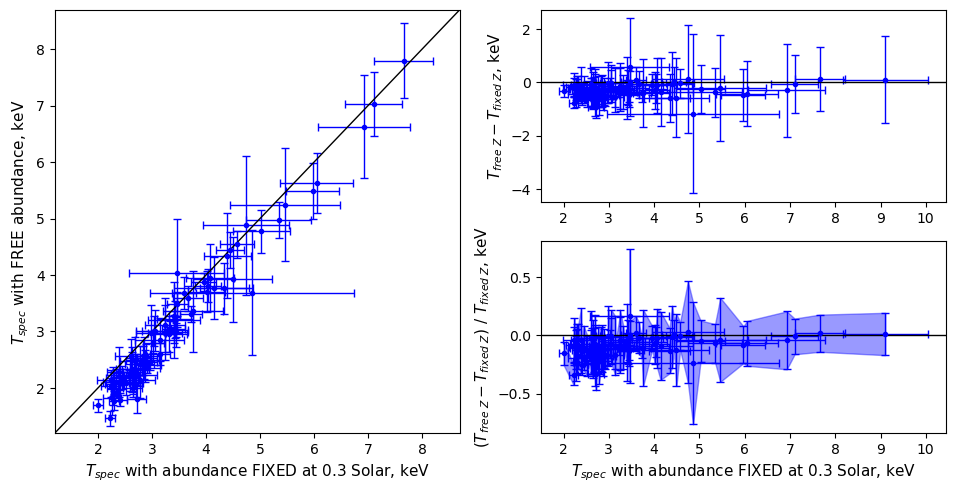

In [494]:
%run -i 'utils/scripts.py'

draw_three_panels(x_array=temp_usr, 
                  y_array=temp_usr_free_abundance,
                  x_label="$T_{spec}$ with abundance FIXED at 0.3 Solar, keV",
                  y_label_left="$T_{spec}$ with FREE abundance, keV",
                  y_label_right_up="$T_{free \ Z} - T_{fixed \ Z}$, keV",
                  y_label_right_down="$(T_{free \ Z} - T_{fixed \ Z}) \ / \ T_{fixed \ Z}$, keV",
                  clr='b')

## (E) Impact of exposure time with FIXED abundance

##### Previously it was set to 10 ks, now it is changed to 2 ks (check it)

In [475]:
#temp_usr_smaller_exposure_5ks

In [476]:
%run -i 'utils/scripts.py'

temp_usr_smaller_exposure_2ks, _, _ = calculate_all_and_average_it(NNNN, write_to_file='ab-fix_cstat_02ks_standard')

 | 171 : 12345678910 | 187 : 1234567

***Warning: New best fit found, fit parameters will be set to new values.


8910 | 350 : 12345678910 | 820 : 12345678910 | 1245 : 12345678910 | 1380 : 12345678910 | 1707 : 12345678910 | 1819 : 12345678910 | 1838 : 12345678910 | 2270 : 12345678910 | 2386 : 12345678910 | 2421 : 12345678910 | 2471 : 12345678910 | 2593 : 12345678910 | 2603 : 12345678910 | 2815 : 12345678910 | 2904 : 12345678910 | 3155 : 12345678910 | 3886 : 12345678910 | 3985 : 12345678910 | 4613 : 1234567

***Warning: Parameter pegged at hard limit: 64


8

***Warning: Parameter pegged at hard limit: 64


910 | 4967 : 12345678910 | 5326 : 1

***Warning: Parameter pegged at hard limit: 64


23456789

***Warning: Parameter pegged at hard limit: 64


10 | 5443 : 1

***Warning: New best fit found, fit parameters will be set to new values.


2345678910 | 6001 : 12345678910 | 6496 : 12345678910 | 6529 : 12345678910 | 6582 : 12345678910 | 6695 : 1234

***Warning: Parameter pegged at hard limit: 64


5678910 | 6740 : 12345678910 | 7191 : 12345678910 | 7308 : 12345678910 | 7364 : 12345678910 | 7409 : 12345678910 | 7553 : 123456

***Warning: New best fit found, fit parameters will be set to new values.


789

***Warning: Parameter pegged at hard limit: 64


10 | 7996 : 123

***Warning: New best fit found, fit parameters will be set to new values.


45678910 | 8211 : 12345678910 | 8930 : 12345678910 | 9240 : 12345678910 | 9389 : 12345678910 | 9636 : 12345678910 | 9836 : 12345678910 | 10018 : 12345678910 | 10548 : 12345678910 | 10551 : 12345678910 | 10820 : 12345678910 | 10842 : 12345678910 | 10928 : 12345678910 | 11141 : 12345678910 | 11272 : 123

***Warning: New best fit found, fit parameters will be set to new values.


45678910 | 11428 : 12345678910 | 11468 : 

***Warning: New best fit found, fit parameters will be set to new values.


12345678910 | 11599 : 12345678910 | 11847 : 12345678910 | 12045 : 12345678910 | 12296 : 12345678910 | 13334 : 

***Warning: Parameter pegged at hard limit: 64


12345678910 | 13675 : 12345678910 | 13751 : 123456789

***Warning: New best fit found, fit parameters will be set to new values.


10 | 14038 : 12345678910 | 14434 : 12345678910 | 14559 : 12345678910 | 14660 : 12345678910 | 14667 : 12345678910 | 14726 : 12345678910 | 14857 : 12345678910 | 14936 : 12345678910 | 15138 : 12345678910 | 16666 : 12345678910 | 17017 : 12345678910 | 17086 : 12345678910 | 17174 : 12345678910 | 17365 : 12345678910 | 17415 : 12345678910 | 17421 : 12345678910 | 17638 : 12345678910 | 17654 : 12345678910 | 17964 : 12345678910 | 18073 : 12345678910 | 18589 : 12345678910 | 18610 : 12345678910 | 19523 : 12345678910 | 19771 : 12345678910 | 19787 : 12345678910

<Figure size 640x480 with 0 Axes>

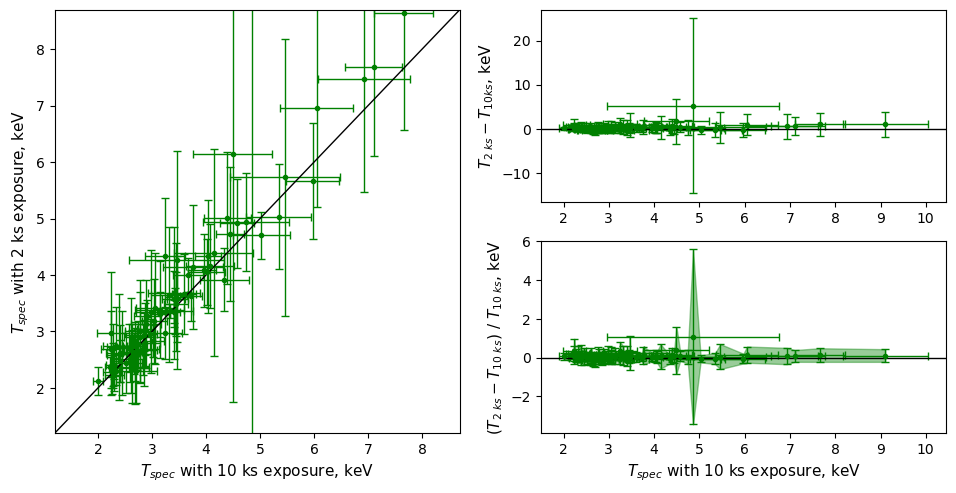

In [477]:
%run -i 'utils/scripts.py'

draw_three_panels(x_array=temp_usr, 
                  y_array=temp_usr_smaller_exposure_2ks,
                  x_label="$T_{spec}$ with 10 ks exposure, keV",
                  y_label_left="$T_{spec}$ with 2 ks exposure, keV",
                  y_label_right_up="$T_{2 \ ks} - T_{10 ks}$, keV",
                  y_label_right_down="$(T_{2 \ ks} - T_{10 \ ks}) \ / \ T_{10 \ ks}$, keV",
                  clr='g')

#### CHECKED: almost no difference for 5 ks. *war relevant for R_vir*

## (E) Impact of statistics with FIXED abundance and 10 ks exposure

#### Previously it was `cstat`, now it is $\chi^2$ (check it)

In [478]:
%run -i 'utils/scripts.py'

temp_usr_chisq, _, _ = calculate_all_and_average_it(NNNN, write_to_file='ab-fix_chisq_10ks_standard')

 | 171 : 1234

***Warning: New best fit found, fit parameters will be set to new values.


5678910 | 187 : 

***Warning: New best fit found, fit parameters will be set to new values.


123

***Warning: New best fit found, fit parameters will be set to new values.


45678

***Warning: New best fit found, fit parameters will be set to new values.
***Warning: New best fit found, fit parameters will be set to new values.


910 | 350 : 12345678910 | 820 : 12345678910 | 1245 : 12345

***Warning: New best fit found, fit parameters will be set to new values.


678910 | 1380 : 1234

***Warning: New best fit found, fit parameters will be set to new values.


5678

***Warning: New best fit found, fit parameters will be set to new values.
***Warning: New best fit found, fit parameters will be set to new values.


910 | 1707 : 12345678910 | 1819 : 12345678910 | 1838 : 1234

***Warning: New best fit found, fit parameters will be set to new values.


5678910 | 2270 : 12345678910 | 2386 : 12345678

***Warning: New best fit found, fit parameters will be set to new values.
***Warning: New best fit found, fit parameters will be set to new values.
***Warning: New best fit found, fit parameters will be set to new values.


9

***Warning: New best fit found, fit parameters will be set to new values.


10 | 2421 : 12345678910 | 2471 : 12345678910 | 2593 : 12345678910 | 2603 : 12345678910 | 2815 : 123456789

***Warning: New best fit found, fit parameters will be set to new values.
***Warning: New best fit found, fit parameters will be set to new values.


10 | 2904 : 12345678910 | 3155 : 12345678910 | 3886 : 123

***Warning: New best fit found, fit parameters will be set to new values.


45678910 | 3985 : 12345678910 | 4613 : 12345678910 | 4967 : 12345678910 | 5326 : 12345678910 | 5443 : 12345678910 | 6001 : 12345678910 | 6496 : 12345678

***Warning: Parameter pegged at hard limit: 64


910 | 6529 : 12345678910 | 6582 : 1234567

***Warning: New best fit found, fit parameters will be set to new values.


8910 | 6695 : 12345678910 | 6740 : 12345678910 | 7191 : 12345678910 | 7308 : 12345678910 | 7364 : 12345678910 | 7409 : 12345678910 | 7553 : 12345678910 | 7996 : 

***Warning: New best fit found, fit parameters will be set to new values.


1

***Warning: New best fit found, fit parameters will be set to new values.


2

***Warning: New best fit found, fit parameters will be set to new values.


3

***Warning: New best fit found, fit parameters will be set to new values.


4

***Warning: New best fit found, fit parameters will be set to new values.
***Warning: New best fit found, fit parameters will be set to new values.


5

***Warning: New best fit found, fit parameters will be set to new values.


678

***Warning: New best fit found, fit parameters will be set to new values.
***Warning: New best fit found, fit parameters will be set to new values.
***Warning: New best fit found, fit parameters will be set to new values.


910 | 8211 : 1

***Warning: New best fit found, fit parameters will be set to new values.


23

***Warning: New best fit found, fit parameters will be set to new values.


45678910 | 8930 : 123456789

***Warning: New best fit found, fit parameters will be set to new values.
***Warning: New best fit found, fit parameters will be set to new values.


10 | 9240 : 12

***Warning: New best fit found, fit parameters will be set to new values.
***Warning: New best fit found, fit parameters will be set to new values.


3

***Warning: New best fit found, fit parameters will be set to new values.


4

***Warning: New best fit found, fit parameters will be set to new values.
***Warning: New best fit found, fit parameters will be set to new values.
***Warning: New best fit found, fit parameters will be set to new values.
***Warning: New best fit found, fit parameters will be set to new values.
***Warning: New best fit found, fit parameters will be set to new values.
***Warning: New best fit found, fit parameters will be set to new values.
***Warning: New best fit found, fit parameters will be set to new values.
***Warning: New best fit found, fit parameters will be set to new values.


5

***Warning: New best fit found, fit parameters will be set to new values.
***Warning: New best fit found, fit parameters will be set to new values.
***Warning: New best fit found, fit parameters will be set to new values.


67

***Warning: New best fit found, fit parameters will be set to new values.


8

***Warning: New best fit found, fit parameters will be set to new values.


9

***Warning: New best fit found, fit parameters will be set to new values.
***Warning: New best fit found, fit parameters will be set to new values.


10 | 9389 : 12345678910 | 9636 : 12345

***Warning: New best fit found, fit parameters will be set to new values.


678910 | 9836 : 12

***Warning: New best fit found, fit parameters will be set to new values.


345678910 | 10018 : 123456789

***Warning: New best fit found, fit parameters will be set to new values.


10 | 10548 : 12345678910 | 10551 : 12345678910 | 10820 : 1

***Warning: New best fit found, fit parameters will be set to new values.
***Warning: New best fit found, fit parameters will be set to new values.


2

***Warning: New best fit found, fit parameters will be set to new values.
***Warning: New best fit found, fit parameters will be set to new values.
***Warning: New best fit found, fit parameters will be set to new values.


345

***Warning: New best fit found, fit parameters will be set to new values.


678

***Warning: New best fit found, fit parameters will be set to new values.


910 | 10842 : 

***Warning: New best fit found, fit parameters will be set to new values.
***Warning: New best fit found, fit parameters will be set to new values.


12345678910 | 10928 : 12345678910 | 11141 : 12345678910 | 11272 : 123456

***Warning: New best fit found, fit parameters will be set to new values.
***Warning: New best fit found, fit parameters will be set to new values.
***Warning: New best fit found, fit parameters will be set to new values.


78910 | 11428 : 12345678910 | 11468 : 1

***Warning: New best fit found, fit parameters will be set to new values.
***Warning: New best fit found, fit parameters will be set to new values.


2

***Warning: New best fit found, fit parameters will be set to new values.


345

***Warning: New best fit found, fit parameters will be set to new values.
***Warning: New best fit found, fit parameters will be set to new values.


678910 | 11599 : 12345678910 | 11847 : 

***Warning: New best fit found, fit parameters will be set to new values.
***Warning: New best fit found, fit parameters will be set to new values.


1234567

***Warning: New best fit found, fit parameters will be set to new values.


89

***Warning: New best fit found, fit parameters will be set to new values.


10 | 12045 : 1234

***Warning: New best fit found, fit parameters will be set to new values.
***Warning: New best fit found, fit parameters will be set to new values.
***Warning: New best fit found, fit parameters will be set to new values.
***Warning: New best fit found, fit parameters will be set to new values.


5

***Warning: New best fit found, fit parameters will be set to new values.
***Warning: New best fit found, fit parameters will be set to new values.
***Warning: New best fit found, fit parameters will be set to new values.


678910 | 12296 : 12345678910 | 13334 : 1234

***Warning: New best fit found, fit parameters will be set to new values.
***Warning: Parameter pegged at hard limit: 64


5678

***Warning: Parameter pegged at hard limit: 64


9

***Warning: Parameter pegged at hard limit: 64


10 | 13675 : 12345678910 | 13751 : 

***Warning: New best fit found, fit parameters will be set to new values.


12345678910 | 14038 : 123

***Warning: New best fit found, fit parameters will be set to new values.


45678910 | 14434 : 12345678910 | 14559 : 

***Warning: New best fit found, fit parameters will be set to new values.


1

***Warning: New best fit found, fit parameters will be set to new values.


2345678

***Warning: New best fit found, fit parameters will be set to new values.
***Warning: New best fit found, fit parameters will be set to new values.
***Warning: New best fit found, fit parameters will be set to new values.


9

***Warning: New best fit found, fit parameters will be set to new values.


10 | 14660 : 12345678910 | 14667 : 12345678910 | 14726 : 12345678910 | 14857 : 12345678910 | 14936 : 12345678910 | 15138 : 12345678910 | 16666 : 12345678910 | 17017 : 12345678910 | 17086 : 

***Warning: New best fit found, fit parameters will be set to new values.


12345

***Warning: New best fit found, fit parameters will be set to new values.


678910 | 17174 : 12345678910 | 17365 : 12345678910 | 17415 : 12345678910 | 17421 : 12345678910 | 17638 : 12345678910 | 17654 : 12345678910 | 17964 : 12345678910 | 18073 : 12345678910 | 18589 : 12345678910 | 18610 : 12345678910 | 19523 : 

***Warning: New best fit found, fit parameters will be set to new values.


12

***Warning: New best fit found, fit parameters will be set to new values.
***Warning: New best fit found, fit parameters will be set to new values.


3

***Warning: New best fit found, fit parameters will be set to new values.
***Warning: New best fit found, fit parameters will be set to new values.


4

***Warning: New best fit found, fit parameters will be set to new values.


5

***Warning: New best fit found, fit parameters will be set to new values.


6

***Warning: New best fit found, fit parameters will be set to new values.


78

***Warning: New best fit found, fit parameters will be set to new values.


910 | 19771 : 12345678910 | 19787 : 12345678910

<Figure size 640x480 with 0 Axes>

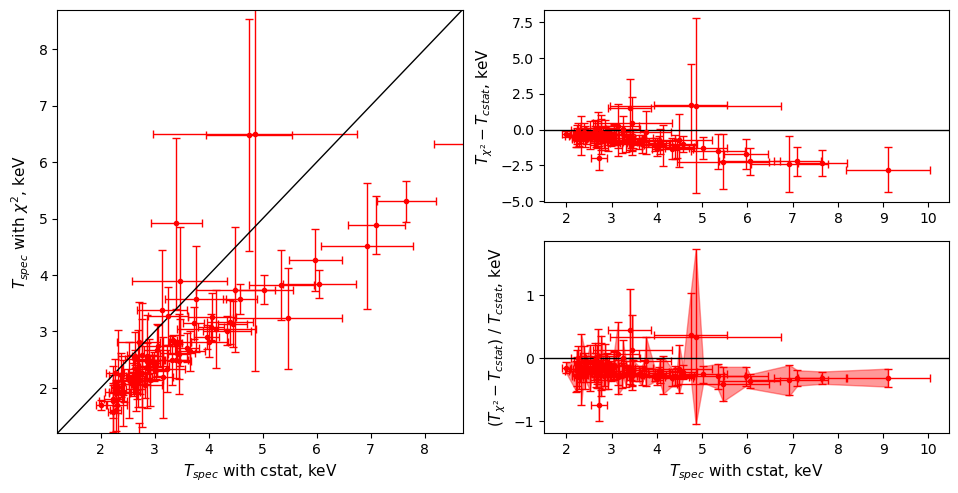

In [479]:
%run -i 'utils/scripts.py'

draw_three_panels(x_array=temp_usr, 
                  y_array=temp_usr_chisq,
                  x_label="$T_{spec}$ with cstat, keV",
                  y_label_left="$T_{spec}$ with $\chi^2$, keV",
                  y_label_right_up="$T_{\chi^2} - T_{cstat}$, keV",
                  y_label_right_down="$(T_{\chi^2} - T_{cstat}) \ / \ T_{cstat}$, keV",
                  clr='r')

## (F) Impact of weights with FIXED abundance, 10 ks exposure and `cstat`

#### Previously it was `standard`, now it is `churazov` (check it)

In [481]:
%run -i 'utils/scripts.py'

temp_usr_churazov, _, _ = calculate_all_and_average_it(NNNN, write_to_file='ab-fix_cstat_10ks_churazov')

 | 171 : 12345678910 | 187 : 12345678910 | 350 : 12345678910 | 820 : 12345678910 | 1245 : 12345678910 | 1380 : 12345678910 | 1707 : 12345678910 | 1819 : 12345678910 | 1838 : 12345678910 | 2270 : 12345678910 | 2386 : 12345678910 | 2421 : 12345678910 | 2471 : 12345678910 | 2593 : 12345678910 | 2603 : 12345678910 | 2815 : 12345678910 | 2904 : 12345678910 | 3155 : 12345678910 | 3886 : 12345678910 | 3985 : 12345678910 | 4613 : 12345678910 | 4967 : 12345678910 | 5326 : 12345678910 | 5443 : 12345678910 | 6001 : 12345678910 | 6496 : 12345678910 | 6529 : 12345678910 | 6582 : 12345678910 | 6695 : 12345678910 | 6740 : 12345678910 | 7191 : 12345678910 | 7308 : 12345678910 | 7364 : 12345678910 | 7409 : 12345678910 | 7553 : 12345678910 | 7996 : 12345678910 | 8211 : 12345678910 | 8930 : 12345678910 | 9240 : 12345678910 | 9389 : 12345678910 | 9636 : 12345678910 | 9836 : 12345678910 | 10018 : 12345678910 | 10548 : 12345678910 | 10551 : 12345678910 | 10820 : 12345678910 | 10842 : 12345678910 | 10928 : 1

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

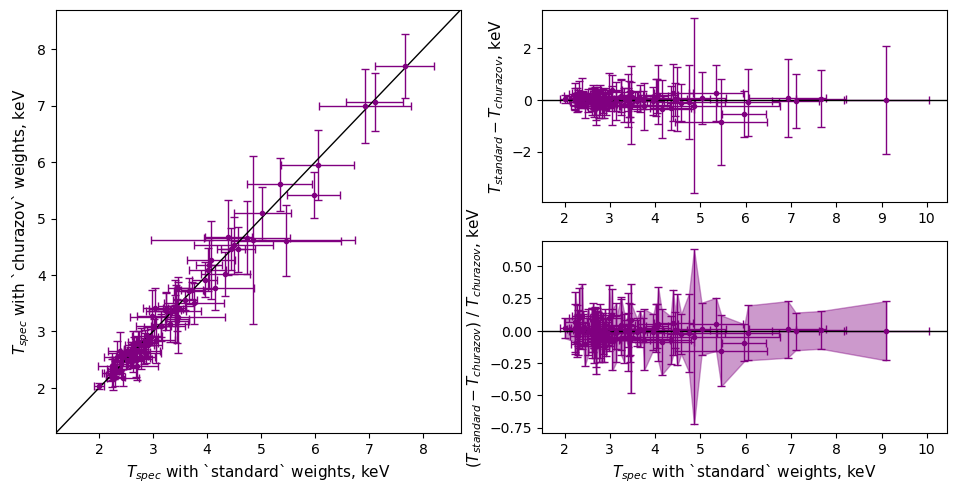

In [484]:
%run -i 'utils/scripts.py'

draw_three_panels(x_array=temp_usr, 
                  y_array=temp_usr_churazov,
                  x_label="$T_{spec}$ with `standard` weights, keV",
                  y_label_left="$T_{spec}$ with `churazov` weights, keV",
                  y_label_right_up="$T_{standard} - T_{churazov}$, keV",
                  y_label_right_down="$(T_{standard} - T_{churazov}) \ / \ T_{churazov}$, keV",
                  clr='purple')

These 4 plots were at first plotted for $R_{vir}$, then for $R_{500}$ (there was a mistake for the second time: it was also for $R_{vir}$). Now (third time) it is for $R_{500}$.

## (G) Adding background

In [495]:
%run -i 'utils/scripts.py'

temp_usr_with_bkg, lumin_usr_with_bkg, aven_usr_with_bkg = calculate_all_and_average_it(NNNN, bkg=True, write_to_file='ab-fix_cstat_10ks_standard_BKG')

 | 171 : 12345678910 | 187 : 12345678910 | 350 : 12345678910 | 820 : 12345678910 | 1245 : 12345678910 | 1380 : 12345678910 | 1707 : 12345678910 | 1819 : 12345678910 | 1838 : 12345678910 | 2270 : 12345678910 | 2386 : 12345678910 | 2421 : 12345678910 | 2471 : 12345678910 | 2593 : 12345678910 | 2603 : 12345678910 | 2815 : 12345678910 | 2904 : 12345678910 | 3155 : 12345678910 | 3886 : 12345678910 | 3985 : 12345678910 | 4613 : 1234567

***Warning: Parameter pegged at hard limit: 64


8910 | 4967 : 12345678910 | 5326 : 12345

***Warning: Parameter pegged at hard limit: 64


678910 | 5443 : 12345678910 | 6001 : 12345678910 | 6496 : 12345678910 | 6529 : 12345678910 | 6582 : 12345678910 | 6695 : 12345678

***Warning: New best fit found, fit parameters will be set to new values.


910 | 6740 : 12345678910 | 7191 : 12345678910 | 7308 : 12345678910 | 7364 : 12345678910 | 7409 : 12345678910 | 7553 : 12345678910 | 7996 : 12345678910 | 8211 : 12345678910 | 8930 : 12345678910 | 9240 : 12345678910 | 9389 : 12345678910 | 9636 : 12345678910 | 9836 : 12345678910 | 10018 : 12345678910 | 10548 : 12345678910 | 10551 : 12345678910 | 10820 : 12345678910 | 10842 : 12345678910 | 10928 : 12345678910 | 11141 : 12345678910 | 11272 : 12345678910 | 11428 : 12345678910 | 11468 : 12

***Warning: New best fit found, fit parameters will be set to new values.


345678

***Warning: New best fit found, fit parameters will be set to new values.


910 | 11599 : 12345678910 | 11847 : 12345678910 | 12045 : 12345678910 | 12296 : 12345678910 | 13334 : 12

***Warning: Parameter pegged at hard limit: 64


345678910 | 13675 : 12345678910 | 13751 : 12345678910 | 14038 : 123456789

***Warning: New best fit found, fit parameters will be set to new values.


10 | 14434 : 12345678910 | 14559 : 12345678910 | 14660 : 12345678910 | 14667 : 12345678910 | 14726 : 12345678910 | 14857 : 12345678910 | 14936 : 12345678910 | 15138 : 12345678910 | 16666 : 12345678910 | 17017 : 12345678910 | 17086 : 12345678910 | 17174 : 12345678910 | 17365 : 12345678910 | 17415 : 12345678910 | 17421 : 12345678910 | 17638 : 12345678910 | 17654 : 12345678910 | 17964 : 12345678910 | 18073 : 12345678910 | 18589 : 12345678910 | 18610 : 12345678910 | 19523 : 12345678910 | 19771 : 12345678910 | 19787 : 12345678910

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

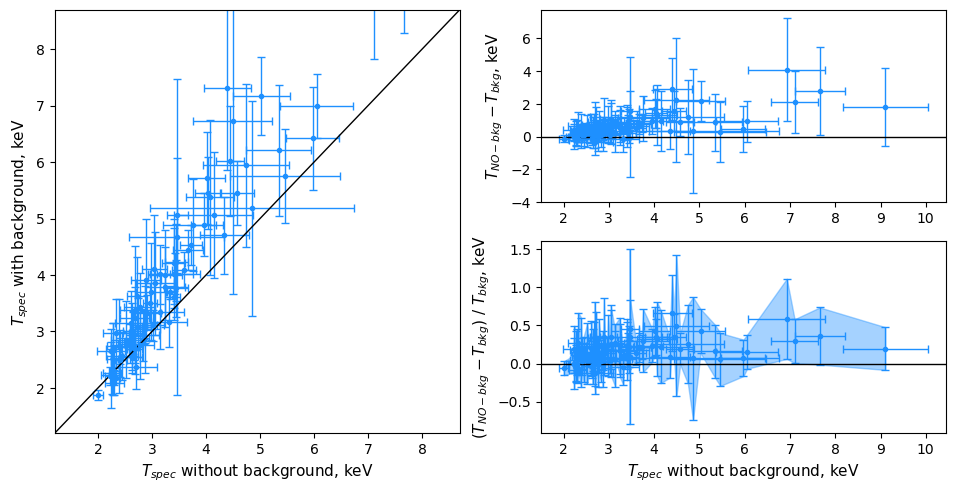

In [497]:
%run -i 'utils/scripts.py'

draw_three_panels(x_array=temp_usr, 
                  y_array=temp_usr_with_bkg,
                  x_label="$T_{spec}$ without background, keV",
                  y_label_left="$T_{spec}$ with background, keV",
                  y_label_right_up="$T_{NO-bkg} - T_{bkg}$, keV",
                  y_label_right_down="$(T_{NO-bkg} - T_{bkg}) \ / \ T_{bkg}$, keV",
                  clr='dodgerblue')

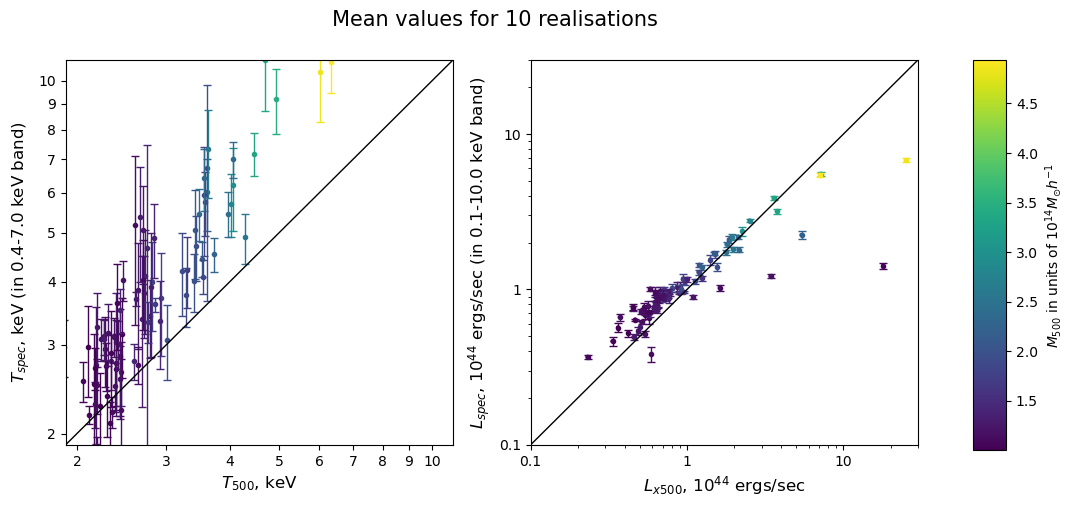

In [500]:
plt.figure(figsize=(11,5))

plt.suptitle(f"     Mean values for {NNNN} realisations", fontsize=15)

plt.subplot(121)

xx = [a[0] for a in temp_usr_with_bkg.values()]
yy = [a[1] for a in temp_usr_with_bkg.values()]
y_err = [a[2] for a in temp_usr_with_bkg.values()]

#plt.errorbar(xx, yy, yerr=[yerr_l, yerr_r], linewidth=0, elinewidth=1, color='b', marker='o', markersize=3)

for xxx, yyy, eee, col in zip(xx, yy, y_err, mass_colour):
    plt.plot(xxx, yyy, '.', color=col)
    plt.errorbar(xxx, yyy, yerr=eee, elinewidth=1, capsize=3, color=col)

plt.xlabel("$T_{500}$, keV", fontsize=12)
plt.ylabel("$T_{spec}$, keV (in 0.4-7.0 keV band)", fontsize=12)

plt.xlim(1.9, 11)
plt.ylim(1.9, 11)

plt.xscale("log")
plt.yscale("log")

plt.xticks([2,3,4,5,6,7,8,9,10], [2,3,4,5,6,7,8,9,10])
plt.yticks([2,3,4,5,6,7,8,9,10], [2,3,4,5,6,7,8,9,10])

plt.plot(plt.gca().get_xlim(), plt.gca().get_ylim(), color='black', linewidth=1)


plt.subplot(122)

xx = [a[0] for a in lumin_usr_with_bkg.values()]
yy = [a[1] for a in lumin_usr_with_bkg.values()]
y_err = [a[2] for a in lumin_usr_with_bkg.values()]

#plt.errorbar(xx, yy, yerr=[yerr_l, yerr_r], linewidth=0, elinewidth=1, color='b', marker='o', markersize=3)

for xxx, yyy, eee, col in zip(xx, yy, y_err, mass_colour):
    plt.plot(xxx, yyy, '.', color=col)
    plt.errorbar(xxx, yyy, yerr=eee, elinewidth=1, capsize=3, color=col)

plt.xlabel("$L_{x500}$, $10^{44}$ ergs/sec", fontsize=12)
plt.ylabel("$L_{spec}$, $10^{44}$ ergs/sec (in 0.1-10.0 keV band)", fontsize=12)

plt.xscale("log")
plt.yscale("log")

plt.xlim(0.15, 30)
plt.ylim(0.15, 30)

plt.xticks([0.1, 1, 10], [0.1, 1, 10])
plt.yticks([0.1, 1, 10], [0.1, 1, 10])

plt.plot( plt.gca().get_xlim(), plt.gca().get_ylim(), color='black', linewidth=1)

plt.subplots_adjust(right=0.9)
sc = plt.scatter(xx, yy, c=masses, s=5)
clb = plt.colorbar(sc, cax = plt.axes([0.95, 0.1, 0.03, 0.78]), 
                   label = "$M_{500}$ in units of $10^{14} M_{\odot} h^{-1}$")

plt.show()

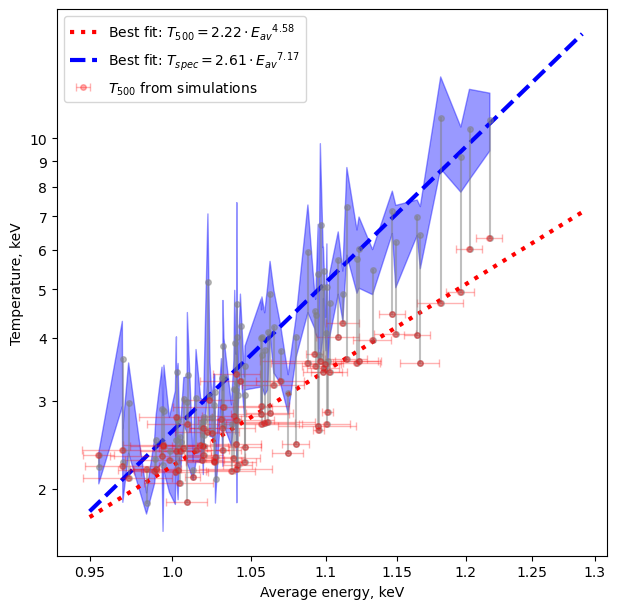

In [502]:
plt.figure(figsize=(7.1,7.1))

xx = [a[0] for a in aven_usr_with_bkg.values()]
x_err = [a[1] for a in aven_usr_with_bkg.values()]
yy1 = [a[0] for a in temp_usr_with_bkg.values()]
yy2 = [a[1] for a in temp_usr_with_bkg.values()]
y2_err = [a[2] for a in temp_usr_with_bkg.values()]

def func(x, a, b):
    return a * x**b

popt1, pcov1 = curve_fit(func, xx, yy1)
popt2, pcov2 = curve_fit(func, xx, yy2)

#for xxx, xe, yyy, ye, col in zip(xx, x_err, yy2, y2_err, mass_colour):
#   plt.plot(xxx, yyy, '.', color=col)
#    plt.errorbar(xxx, yyy, xerr=xe, yerr=ye, elinewidth=1, capsize=3, color=col, label='$T_{spec}$ from fit')

list1, list2, list3 = zip(*sorted(zip(xx, [n-q for n, q in zip(yy2, y2_err)], [n+q for n, q in zip(yy2, y2_err)])))
plt.fill_between(list1, list2, list3, interpolate=False, alpha=0.4, color='blue')

#plt.errorbar(xx, yy2, xerr=x_err, yerr=y2_err, linewidth=0, marker='o', markersize=4, alpha=0.1,
#             elinewidth=1, capsize=3, color='blue', label='$T_{spec}$ from fit')

lll = np.linspace(0.95, 1.29, 100)
plt.plot(lll, [func(XX, *popt1) for XX in lll],  
         color='red', linewidth=3, linestyle=':', alpha=1,
         label=f'Best fit: $T_{{500}} = {popt1[0]:.2f} \cdot {{E_{{av}}}}^{{{popt1[1]:.2f}}}$')
plt.plot(lll, [func(XX, *popt2) for XX in lll],  
         color='blue', linewidth=3, linestyle='--', alpha=1,
         label=f'Best fit: $T_{{spec}} = {popt2[0]:.2f} \cdot {{E_{{av}}}}^{{{popt2[1]:.2f}}}$')

plt.xlabel("Average energy, keV")
plt.ylabel("Temperature, keV")

plt.xscale("log")
plt.yscale("log")

#sc = plt.scatter(xx, yy1, c='red', s=0)
#clb = plt.colorbar(sc, label = "$M_{500}$ in units of $10^{14} M_{\odot} h^{-1}$")

#list1, list2, list3 = zip(*sorted(zip(yy1, [n-q for n, q in zip(xx, x_err)], [n+q for n, q in zip(xx, x_err)])))
#plt.gca().fill_betweenx(list1, list2, list3, interpolate=True, alpha=0.4, color='red')

plt.errorbar(xx, yy1, xerr=x_err, linewidth=0, elinewidth=1, capsize=3,
             color='red', marker='o', markersize=4, alpha=0.3, label='$T_{500}$ from simulations')

#plt.xlim(1.4, 7.5)
#plt.ylim(0.9, 1.3)

plt.xticks([0.95, 1.00, 1.05, 1.10, 1.15, 1.2, 1.25, 1.3], [0.95, 1.00, 1.05, 1.10, 1.15, 1.2, 1.25, 1.3])
plt.yticks([2,3,4,5,6,7,8,9,10], [2,3,4,5,6,7,8,9,10])

for i in range(0, len(aven_usr)):
    plt.plot([xx[i]+0.000454, xx[i]+0.000454], 
             [yy1[i], yy2[i]], 
             color='grey', alpha=0.5, marker='o', markersize=4)

#plt.grid()
plt.legend()

plt.show()

## (H) Temperature energy vs. mass

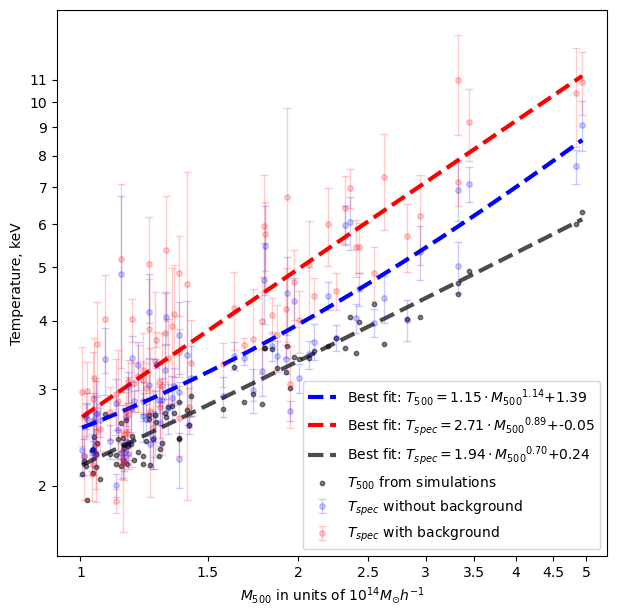

In [572]:
plt.figure(figsize=(7.1,7.1))

MASSES = [m/10**14 for m in clusters["M500"].values] # or just "masses" defined before
T500S = clusters["T500"].values
yyyy1 = [a[1] for a in temp_usr.values()]
yyyy1_err = [a[2] for a in temp_usr.values()]
yyyy2 = [a[1] for a in temp_usr_with_bkg.values()]
yyyy2_err = [a[2] for a in temp_usr_with_bkg.values()]

def func(x, a, b, c):
    return a * x**b + c

popt1, pcov1 = curve_fit(func, MASSES, yyyy1)
popt2, pcov2 = curve_fit(func, MASSES, yyyy2)
popt3, pcov3 = curve_fit(func, MASSES, T500S)

#list1, list2, list3 = zip(*sorted(zip(MASSES, [n-q for n, q in zip(yyyy1, yyyy1_err)], [n+q for n, q in zip(yyyy1, yyyy1_err)])))
#plt.fill_between(list1, list2, list3, interpolate=False, alpha=0.4, color='blue')

plt.errorbar(MASSES, yyyy1, yerr=yyyy1_err, linewidth=0, marker='o', markersize=4, alpha=0.2,
             elinewidth=1, capsize=3, color='blue', label='$T_{spec}$ without background')

#list1, list2, list3 = zip(*sorted(zip(MASSES, [n-q for n, q in zip(yyyy2, yyyy2_err)], [n+q for n, q in zip(yyyy2, yyyy2_err)])))
#plt.fill_between(list1, list2, list3, interpolate=True, alpha=0.4, color='red')

plt.errorbar(MASSES, yyyy2, yerr=yyyy2_err, linewidth=0, marker='o', markersize=4, alpha=0.2,
             elinewidth=1, capsize=3, color='red', label='$T_{spec}$ with background')

lll = np.linspace(min(MASSES), max(MASSES), 100)
plt.plot(lll, [func(XX, *popt1) for XX in lll],  
         color='blue', linewidth=3, linestyle='--', alpha=1,
         label=f'Best fit: $T_{{500}} = {popt1[0]:.2f} \cdot {{M_{{500}}}}^{{{popt1[1]:.2f}}}$+{popt1[2]:.2f}')

plt.plot(lll, [func(XX, *popt2) for XX in lll],  
         color='red', linewidth=3, linestyle='--', alpha=1,
         label=f'Best fit: $T_{{spec}} = {popt2[0]:.2f} \cdot {{M_{{500}}}}^{{{popt2[1]:.2f}}}$+{popt2[2]:.2f}')

plt.plot(lll, [func(XX, *popt3) for XX in lll],  
         color='black', linewidth=3, linestyle='--', alpha=0.7,
         label=f'Best fit: $T_{{spec}} = {popt3[0]:.2f} \cdot {{M_{{500}}}}^{{{popt3[1]:.2f}}}$+{popt3[2]:.2f}')

plt.scatter(MASSES, T500S, color='black', label='$T_{500}$ from simulations', marker='o', s=10, alpha=0.5)


plt.xlabel("$M_{500}$ in units of $10^{14} M_{\odot} h^{-1}$")
plt.ylabel("Temperature, keV")

plt.xscale("log")
plt.yscale("log")

#plt.xlim(1.4, 7.5)
#plt.ylim(0.9, 1.3)

plt.xticks([1,1.5,2,2.5,3,3.5,4,4.5,5], [1,1.5,2,2.5,3,3.5,4,4.5,5])
plt.yticks([2,3,4,5,6,7,8,9,10,11], [2,3,4,5,6,7,8,9,10,11])

#for i in range(0, len(aven_usr)):
#    plt.plot([xx[i]+0.000454, xx[i]+0.000454], 
#             [yy1[i], yy2[i]], 
#             color='grey', alpha=0.5, marker='o', markersize=4)

#plt.grid()
plt.legend()
#plt.savefig('T_vs_M.pdf', format='pdf')
plt.show()

## (I) Average energy vs. mass

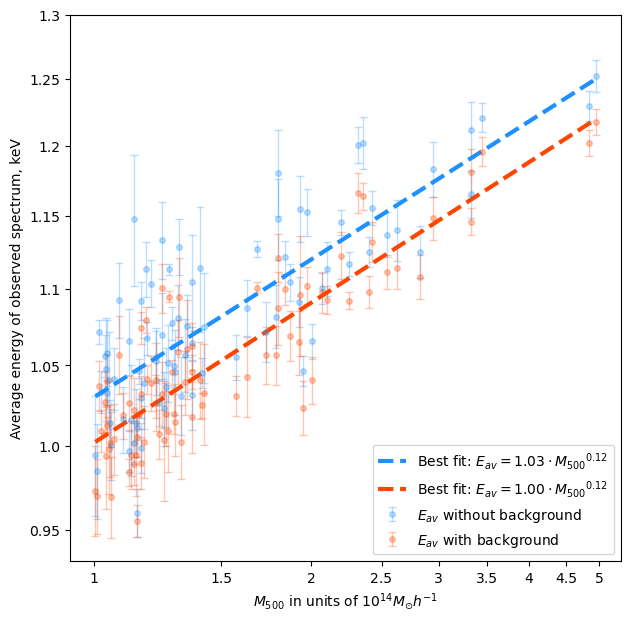

In [574]:
plt.figure(figsize=(7.1,7.1))

MASSES = [m/10**14 for m in clusters["M500"].values] # or just "masses" defined before
#T500S = clusters["T500"].values
yyyy1 = [a[0] for a in aven_usr.values()]
yyyy1_err = [a[1] for a in aven_usr.values()]
yyyy2 = [a[0] for a in aven_usr_with_bkg.values()]
yyyy2_err = [a[1] for a in aven_usr_with_bkg.values()]

def func(x, a, b):
    return a * x**b

popt1, pcov1 = curve_fit(func, MASSES, yyyy1, maxfev=5000)
popt2, pcov2 = curve_fit(func, MASSES, yyyy2, maxfev=5000)

#list1, list2, list3 = zip(*sorted(zip(MASSES, [n-q for n, q in zip(yyyy1, yyyy1_err)], [n+q for n, q in zip(yyyy1, yyyy1_err)])))
#plt.fill_between(list1, list2, list3, interpolate=False, alpha=0.4, color='blue')

plt.errorbar(MASSES, yyyy1, yerr=yyyy1_err, linewidth=0, marker='o', markersize=4, alpha=0.3,
             elinewidth=1, capsize=3, color='dodgerblue', label='$E_{av}$ without background')

#list1, list2, list3 = zip(*sorted(zip(MASSES, [n-q for n, q in zip(yyyy2, yyyy2_err)], [n+q for n, q in zip(yyyy2, yyyy2_err)])))
#plt.fill_between(list1, list2, list3, interpolate=True, alpha=0.4, color='red')

plt.errorbar(MASSES, yyyy2, yerr=yyyy2_err, linewidth=0, marker='o', markersize=4, alpha=0.3,
             elinewidth=1, capsize=3, color='orangered', label='$E_{av}$ with background')

#plt.scatter(MASSES, T500S, color='black', label='$T_{500}$ from simulations')

lll = np.linspace(min(MASSES), max(MASSES), 100)
plt.plot(lll, [func(XX, *popt1) for XX in lll],  
         color='dodgerblue', linewidth=3, linestyle='--', alpha=1,
         label=f'Best fit: $E_{{av}} = {popt1[0]:.2f} \cdot {{M_{{500}}}}^{{{popt1[1]:.2f}}}$')

plt.plot(lll, [func(XX, *popt2) for XX in lll],  
         color='orangered', linewidth=3, linestyle='--', alpha=1,
         label=f'Best fit: $E_{{av}} = {popt2[0]:.2f} \cdot {{M_{{500}}}}^{{{popt2[1]:.2f}}}$')

plt.xlabel("$M_{500}$ in units of $10^{14} M_{\odot} h^{-1}$")
plt.ylabel("Average energy of observed spectrum, keV")

plt.xscale("log")
plt.yscale("log")

#sc = plt.scatter(xx, yy1, c='red', s=0)
#clb = plt.colorbar(sc, label = "$M_{500}$ in units of $10^{14} M_{\odot} h^{-1}$")

#plt.xlim(1.4, 7.5)
#plt.ylim(0.9, 1.3)

plt.xticks([1,1.5,2,2.5,3,3.5,4,4.5,5], [1,1.5,2,2.5,3,3.5,4,4.5,5])
plt.yticks([0.95, 1.00, 1.05, 1.10, 1.15, 1.2, 1.25, 1.3], [0.95, 1.00, 1.05, 1.10, 1.15, 1.2, 1.25, 1.3])


#for i in range(0, len(aven_usr)):
#    plt.plot([xx[i]+0.000454, xx[i]+0.000454], 
#             [yy1[i], yy2[i]], 
#             color='grey', alpha=0.5, marker='o', markersize=4)

#plt.grid()
plt.legend()
plt.savefig('figures/Eav_vs_M.pdf', format='pdf')

plt.show()

(array([16., 24., 15.,  8.,  6.,  5.,  2.,  2.,  2.,  0.,  2.,  1.,  0.,
         0.,  1.]),
 array([2.00286568, 2.47626822, 2.94967075, 3.42307329, 3.89647583,
        4.36987837, 4.84328091, 5.31668344, 5.79008598, 6.26348852,
        6.73689106, 7.2102936 , 7.68369614, 8.15709867, 8.63050121,
        9.10390375]),
 <BarContainer object of 15 artists>)

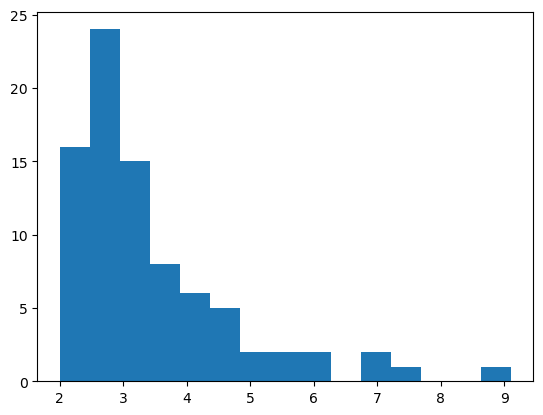

In [579]:
testtt = [a[1] for a in temp_usr.values()]
plt.hist(testtt, bins=15)